# Linear Regression Project Pt. 2 - Cleaning

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)

## BROOKLYN CLEANING

In [2]:
brooklyn = pd.read_csv('brooklyn_df.csv')
brooklyn.head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,"$2,750",►►STUNNING 3 BEDROOM W/ QUEEN-SIZED ROOMS IN BUSHWICK★NO FEE★,(Bushwick),3BR,1Ba,NaN,$20 Application Fee,No Broker Fee,True,True,on site,street
1,1,"$2,950",►►1 BEDROOM IN NEW LUXURY BLDG IN PARK SLOPE W/ EVERY AMENITY★NO FEE★,(Park Slope),1BR,1Ba,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2,2,"$2,700",✸3 bedroom washer dryer ready for move in✸,(Bedford Stuyvesant),3BR,1Ba,NaN,NaN,NaN,True,True,in bldg,street
3,3,"$2,500",New Gut Renovated 3 Bedroom+Laundry+Hardwood Fls,(BROOKLYN),3BR,1Ba,900.0,$20 PER ADULT,$2500,True,True,in bldg,street
4,4,"$1,999",2 FULL SIZED BEDROOMS/ 3 MINUTE WALK TO Q TRAIN,(PROSPECT LEFFERTS GARDEN),2BR,1Ba,700.0,$20 PER ADULT,$1999,NaN,NaN,none,street


In [3]:
brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   PRICE       2996 non-null   object 
 2   TITLE       2996 non-null   object 
 3   LOCATION    2822 non-null   object 
 4   BR          2996 non-null   object 
 5   BA          2996 non-null   object 
 6   SQFT        360 non-null    float64
 7   APP_FEE     597 non-null    object 
 8   BROK_FEE    621 non-null    object 
 9   CATS        2381 non-null   object 
 10  DOGS        2288 non-null   object 
 11  WD          2948 non-null   object 
 12  PARKING     2906 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 304.8+ KB


In [4]:
#looking for duplicates by title
((brooklyn[brooklyn.TITLE.duplicated() == True]).sort_values(by='TITLE')).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
2475,2475,"$2,999",!!!!STUNNING 3BR/2BA Duplex___Large Basement___CROWN HEIGHTS!!!!,(Crown Heights),4BR,2Ba,NaN,NaN,NaN,True,True,in unit,street
2043,2043,"$2,899",!!!!STUNNING 3BR/2BA Duplex___Large Basement___CROWN HEIGHTS!!!!,(Crown Heights),4BR,2Ba,NaN,NaN,NaN,True,True,in unit,street
1675,1675,"$2,899",!!!!STUNNING 3BR/2BA Duplex___Large Basement___CROWN HEIGHTS!!!!,(Crown Heights),4BR,2Ba,NaN,NaN,NaN,True,True,in unit,street
969,969,"$2,199",!!MOVE IN READY!! WASHER AND DRYER!! ROOF ACCESS!!,(Gravesend),2BR,1Ba,NaN,NaN,NO FEE,NaN,NaN,in unit,street
1530,1530,"$2,199",!!MOVE IN READY!! WASHER AND DRYER!! ROOF ACCESS!!,(Gravesend),2BR,1Ba,NaN,NaN,NO FEE,NaN,NaN,in unit,street


In [5]:
brooklyn = brooklyn.drop_duplicates(subset='TITLE', keep='first')
brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1859 non-null   int64  
 1   PRICE       1858 non-null   object 
 2   TITLE       1858 non-null   object 
 3   LOCATION    1735 non-null   object 
 4   BR          1858 non-null   object 
 5   BA          1858 non-null   object 
 6   SQFT        253 non-null    float64
 7   APP_FEE     363 non-null    object 
 8   BROK_FEE    380 non-null    object 
 9   CATS        1407 non-null   object 
 10  DOGS        1348 non-null   object 
 11  WD          1826 non-null   object 
 12  PARKING     1802 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


In [6]:
#looking for missing price values
(brooklyn[brooklyn.PRICE.isna() == True]).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
91,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#dropping missing price values
brooklyn = brooklyn.dropna(subset = ['PRICE'])

In [8]:
#cleaning columns
brooklyn = brooklyn.drop('Unnamed: 0', axis=1)
brooklyn['PRICE'] = brooklyn.PRICE.str.replace(',', '').str.replace('$','')
brooklyn['BR'] = brooklyn.BR.astype('str').str.rstrip('BR')
brooklyn['BA'] = brooklyn.BA.astype('str').str.rstrip('Ba')
brooklyn['LOCATION'] = brooklyn.LOCATION.astype(str).str.replace('(','').str.replace(')','')
brooklyn.head()

<ipython-input-8-42c86a97323e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  brooklyn['PRICE'] = brooklyn.PRICE.str.replace(',', '').str.replace('$','')
<ipython-input-8-42c86a97323e>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  brooklyn['LOCATION'] = brooklyn.LOCATION.astype(str).str.replace('(','').str.replace(')','')


,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,2750,►►STUNNING 3 BEDROOM W/ QUEEN-SIZED ROOMS IN BUSHWICK★NO FEE★,Bushwick,3,1,NaN,$20 Application Fee,No Broker Fee,True,True,on site,street
1,2950,►►1 BEDROOM IN NEW LUXURY BLDG IN PARK SLOPE W/ EVERY AMENITY★NO FEE★,Park Slope,1,1,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2,2700,✸3 bedroom washer dryer ready for move in✸,Bedford Stuyvesant,3,1,NaN,NaN,NaN,True,True,in bldg,street
3,2500,New Gut Renovated 3 Bedroom+Laundry+Hardwood Fls,BROOKLYN,3,1,900.0,$20 PER ADULT,$2500,True,True,in bldg,street
4,1999,2 FULL SIZED BEDROOMS/ 3 MINUTE WALK TO Q TRAIN,PROSPECT LEFFERTS GARDEN,2,1,700.0,$20 PER ADULT,$1999,NaN,NaN,none,street


In [9]:
brooklyn.BA.unique()

array(['1', '2', '1.5', '3', '2.5', '5', 'split', 'shared', '4', '0', '8'],
      dtype=object)

In [10]:
brooklyn.loc[brooklyn['BA'] == 'split', 'BA'] = '0'
brooklyn.loc[brooklyn['BA'] == 'shared', 'BA'] = '0'
brooklyn.BA.unique()

array(['1', '2', '1.5', '3', '2.5', '5', '0', '4', '8'], dtype=object)

In [11]:
#changing data types
brooklyn['BA'] = brooklyn.BA.astype(float)
brooklyn['BR'] = brooklyn.BR.astype(float)
brooklyn['PRICE'] = brooklyn.PRICE.astype(float)
brooklyn['SQFT'] = brooklyn.SQFT.astype(float)

In [12]:
#looking for suspiciously low sq footage
brooklyn.sort_values(by=['SQFT'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1964,1200.0,Private Studio in a Butterfly Garden,Brighton Beach,1.0,1.0,250.0,NaN,only half a month's rent,True,NaN,none,off-street
587,1225.0,Warm Stylish Studio * Separate Kitchen *,Brighton Beach,0.0,1.0,275.0,$25.00 credit check may apply;,NaN,True,NaN,none,street
2631,1050.0,Antique Studio,Industrial Williamsburg,0.0,1.0,300.0,NaN,NaN,NaN,NaN,none,none
586,1495.0,"Gravesend, Studio. DSJ 718 266-3700","Gravesend, West 2nd / Avenue Z",0.0,1.0,300.0,$20 per person,NaN,NaN,NaN,in bldg,street
165,1150.0,Newly Renovated Walk in Studio Apt. All Utilites Incl. Private House,Sheepshead Bay/Marine Park/Gravesend/Bensonhurst,0.0,1.0,380.0,NaN,one month's rent for broker fee,NaN,NaN,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,3000.0,MODERN - NO FEE - LAUNDRY - 3 BED APARTMENT IN HEART OF BEDSTUY,"Bedford-Stuyvesant, Brooklyn",3.0,1.0,NaN,NaN,NaN,True,True,in bldg,street
2994,2400.0,CROWN HEIGHTS * 2 BED / 1 BATH * LAUNDRY * CENTRAL AC * SUBWAY TILES,Crown heights,2.0,1.0,NaN,NaN,NaN,True,True,in bldg,street
2996,2200.0,NO FEE * 2 BED 2 BATH * LAUNDRY * CENTRAL AC * 10 MIN WALK TO BEACH,Brighton Beach,2.0,2.0,NaN,NaN,NaN,True,True,none,off-street
2997,2400.0,"3br w/Courtyard, Hardwood Floors, & Tile Backsplash",Bay Ridge,3.0,1.0,NaN,NaN,NaN,True,NaN,none,none


In [13]:
#looking for suspiciously high sq footage
brooklyn.sort_values(by=['SQFT'], ascending = False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
2070,3600000.0,8 Units on Madison Street in Brooklyn,New York,8.0,8.0,6200.0,NaN,NaN,NaN,NaN,in unit,street
1307,4000.0,Master Bedroom Suite in Spacious Townhome,Brooklyn,3.0,4.0,2700.0,NaN,NaN,NaN,NaN,in unit,street
480,4500.0,Triplex Townhouse 5br 2Baths/Washer Dryer.Private Yard.Plus studio,BEDFORD STUYVESANT,5.0,2.0,2400.0,NaN,NaN,True,True,in unit,none
2215,3000.0,3 Bedroom,Brooklyn park Slope,3.0,2.0,2199.0,NaN,NaN,NaN,NaN,hookups,street
1135,3600.0,"Brooklyn | Spacious 3 + 2 | NYC Subway, Bus Lines, Gateway Mall",UTILITIES INCLUDED * Brooklyn + Spring Creek + East NewYork*,3.0,2.0,2100.0,$25 backround and credit check,NaN,True,True,none,off-street
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,3000.0,MODERN - NO FEE - LAUNDRY - 3 BED APARTMENT IN HEART OF BEDSTUY,"Bedford-Stuyvesant, Brooklyn",3.0,1.0,NaN,NaN,NaN,True,True,in bldg,street
2994,2400.0,CROWN HEIGHTS * 2 BED / 1 BATH * LAUNDRY * CENTRAL AC * SUBWAY TILES,Crown heights,2.0,1.0,NaN,NaN,NaN,True,True,in bldg,street
2996,2200.0,NO FEE * 2 BED 2 BATH * LAUNDRY * CENTRAL AC * 10 MIN WALK TO BEACH,Brighton Beach,2.0,2.0,NaN,NaN,NaN,True,True,none,off-street
2997,2400.0,"3br w/Courtyard, Hardwood Floors, & Tile Backsplash",Bay Ridge,3.0,1.0,NaN,NaN,NaN,True,NaN,none,none


In [14]:
#looking for suspiciously low prices
brooklyn.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
2002,1.0,"Fantastic, and spacious no broker fee apartment. Will not last",Brooklyn,1.0,1.0,NaN,NaN,NaN,True,True,in unit,street
2429,1.0,Brooklyn apartments for rent. Move in ready. H/G/W Included,Great,1.0,1.0,NaN,NaN,NaN,True,True,in unit,street
1076,1.0,Updated apartments for rent. Affordable and luxury. No brk fee!,Brooklyn,1.0,1.0,NaN,NaN,NaN,NaN,NaN,on site,street
2999,700.0,RENTED: 1Bed (in 2B/1B) Sweet Lighting,Sunset Park,1.0,0.0,NaN,NaN,NaN,NaN,NaN,none,street
1991,742.0,🔥Shamokin Seller Finance Deal🔥,nan,3.0,1.0,NaN,NaN,NaN,NaN,NaN,in unit,street
...,...,...,...,...,...,...,...,...,...,...,...,...
578,8300.0,►INSANE 3 BEDROOM 2 BATH IN LUXURY BLDG ON WILLIAMSBURG WATERFRONT★★,Williamsburg,3.0,2.0,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2342,8300.0,*Beautiful 3-Bedroom 2-Bathroom Apartments in Prime Williamsburg*,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in unit,street
2598,8300.0,Dope Williamsburg 3 Bed!,Williamsburg,3.0,2.0,NaN,$9.29 for Credit Check,No Fee,NaN,NaN,in unit,none
2461,11207.0,No fee!Amazing 3beds w/ hw floors & central a/c,nan,3.0,1.0,NaN,NaN,NaN,True,True,in bldg,none


In [15]:
#going to eliminate these non-listings
brooklyn.loc[brooklyn.PRICE == 1.0, 'BA'] = 0

In [21]:
brooklyn.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1991,742.0,🔥Shamokin Seller Finance Deal🔥,nan,3.0,1.0,NaN,NaN,NaN,NaN,NaN,in unit,street
2449,800.0,"**HUGE ROOM, SPACIOUS,WASHER, DRYER , DISHWASHER, STEPS TO TRAIN, NICE",Flatbush/Prospect lefferts gardens,0.0,1.0,NaN,NaN,NaN,NaN,NaN,none,street
228,850.0,1 room in 3 bedroom,nan,3.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,garage
182,856.0,🔥Curwensville Seller Finance Deal🔥,nan,3.0,2.0,NaN,NaN,NaN,NaN,NaN,hookups,street
2048,875.0,Dec 1st // Sunny large room in quaint apt,Brooklyn,4.0,1.0,NaN,NaN,NaN,NaN,NaN,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
2342,8300.0,*Beautiful 3-Bedroom 2-Bathroom Apartments in Prime Williamsburg*,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in unit,street
578,8300.0,►INSANE 3 BEDROOM 2 BATH IN LUXURY BLDG ON WILLIAMSBURG WATERFRONT★★,Williamsburg,3.0,2.0,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2598,8300.0,Dope Williamsburg 3 Bed!,Williamsburg,3.0,2.0,NaN,$9.29 for Credit Check,No Fee,NaN,NaN,in unit,none
2748,8300.0,WILLIAMSBURG * 3 BED 2 BATH * LAUNDRY * GYM * ELEVATOR * ROOF DECK,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in bldg,street


In [23]:
#looking for this misleading listing pattern--not for rent
def scam_checker(df):
    for title in df.TITLE:
        if "Seller Finance Deal" in title:
            df.loc[df['TITLE'] == title, 'BA'] = 0

In [24]:
scam_checker(brooklyn)

In [25]:
brooklyn.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1991,742.0,🔥Shamokin Seller Finance Deal🔥,nan,3.0,0.0,NaN,NaN,NaN,NaN,NaN,in unit,street
2449,800.0,"**HUGE ROOM, SPACIOUS,WASHER, DRYER , DISHWASHER, STEPS TO TRAIN, NICE",Flatbush/Prospect lefferts gardens,0.0,1.0,NaN,NaN,NaN,NaN,NaN,none,street
228,850.0,1 room in 3 bedroom,nan,3.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,garage
182,856.0,🔥Curwensville Seller Finance Deal🔥,nan,3.0,0.0,NaN,NaN,NaN,NaN,NaN,hookups,street
2048,875.0,Dec 1st // Sunny large room in quaint apt,Brooklyn,4.0,1.0,NaN,NaN,NaN,NaN,NaN,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
2342,8300.0,*Beautiful 3-Bedroom 2-Bathroom Apartments in Prime Williamsburg*,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in unit,street
578,8300.0,►INSANE 3 BEDROOM 2 BATH IN LUXURY BLDG ON WILLIAMSBURG WATERFRONT★★,Williamsburg,3.0,2.0,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2598,8300.0,Dope Williamsburg 3 Bed!,Williamsburg,3.0,2.0,NaN,$9.29 for Credit Check,No Fee,NaN,NaN,in unit,none
2748,8300.0,WILLIAMSBURG * 3 BED 2 BATH * LAUNDRY * GYM * ELEVATOR * ROOF DECK,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in bldg,street


In [26]:
#looking for suspiciously high prices
brooklyn.sort_values(by=['PRICE'], ascending = False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
2461,11207.0,No fee!Amazing 3beds w/ hw floors & central a/c,nan,3.0,1.0,NaN,NaN,NaN,True,True,in bldg,none
2748,8300.0,WILLIAMSBURG * 3 BED 2 BATH * LAUNDRY * GYM * ELEVATOR * ROOF DECK,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in bldg,street
578,8300.0,►INSANE 3 BEDROOM 2 BATH IN LUXURY BLDG ON WILLIAMSBURG WATERFRONT★★,Williamsburg,3.0,2.0,NaN,$20 Application Fee,No Broker Fee,True,True,in bldg,street
2598,8300.0,Dope Williamsburg 3 Bed!,Williamsburg,3.0,2.0,NaN,$9.29 for Credit Check,No Fee,NaN,NaN,in unit,none
2342,8300.0,*Beautiful 3-Bedroom 2-Bathroom Apartments in Prime Williamsburg*,Williamsburg,3.0,2.0,NaN,NaN,NaN,True,True,in unit,street
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,875.0,Dec 1st // Sunny large room in quaint apt,Brooklyn,4.0,1.0,NaN,NaN,NaN,NaN,NaN,none,none
182,856.0,🔥Curwensville Seller Finance Deal🔥,nan,3.0,0.0,NaN,NaN,NaN,NaN,NaN,hookups,street
228,850.0,1 room in 3 bedroom,nan,3.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,garage
2449,800.0,"**HUGE ROOM, SPACIOUS,WASHER, DRYER , DISHWASHER, STEPS TO TRAIN, NICE",Flatbush/Prospect lefferts gardens,0.0,1.0,NaN,NaN,NaN,NaN,NaN,none,street


In [27]:
#not an apt listing, going to remove
brooklyn.loc[brooklyn.PRICE == 3600000.0, 'BA'] = 0

In [28]:
#looking at shared bathrooms
brooklyn.loc[brooklyn.BA == 0]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
182,856.0,🔥Curwensville Seller Finance Deal🔥,nan,3.0,0.0,NaN,NaN,NaN,NaN,NaN,hookups,street
1991,742.0,🔥Shamokin Seller Finance Deal🔥,nan,3.0,0.0,NaN,NaN,NaN,NaN,NaN,in unit,street


In [29]:
#fixing/filling in missing info
brooklyn.loc[brooklyn.TITLE == '2 Bed w/ On-Site Laundry, Hardwood Fl, Eat-In Kitchen & More', 'BA'] = 1.0
brooklyn.loc[brooklyn.TITLE == 'Brand new renovated 3 bedroom home office duplex*washer/dryer*Private', 'BA'] = 1.5
brooklyn.loc[brooklyn.TITLE == 'CROWN HEIGHTS PROMO~NO FEE!~NEWLY RENOVATED~ROOF ACCESS~LAUNDRY~SPACIO', 'BA'] = 1.5
brooklyn.loc[brooklyn.TITLE == 'FLATBUSH~NO FEE~DUPLEX~NEWLY RENOV~OUTDOOR SPACE~EXPOSED BRICK~HOME OF', 'BA'] = 1.5
brooklyn.loc[brooklyn.TITLE == 'CROWN HEIGHTS~NO FEE!~NEWLY RENOV~DUPLEX~BACKYARD~LAUNDRY IN UNIT~EXPO', 'BA'] = 1.5

In [30]:
#dropping errors and shared rooms
brooklyn = brooklyn[brooklyn.BA > 0]

In [31]:
brooklyn['LOCATION'] = brooklyn['LOCATION'].apply(str.upper)
brooklyn['LOCATION'] = brooklyn['LOCATION'].apply(str.strip)
brooklyn.LOCATION.unique()

array(['BUSHWICK', 'PARK SLOPE', 'BEDFORD STUYVESANT', 'BROOKLYN',
       'PROSPECT LEFFERTS GARDEN', 'BROOKLYN/CROWN HEIGHTS', 'GREENPOINT',
       'BROOKLYN/CROWNHEIGHTS', 'BROOKLYN/BUSHWICK', 'BROOKLYN/FLATBUSH',
       'JEFFERSON ST - L TRAIN', 'WILLIAMSBURG', 'CLINTON HILL', 'PLG',
       'CROWN HEIGHTS', 'WILLIAMSBURGE', 'BEDFORD-STUYVESANT',
       'BUSHWICK/EAST WILLIAMSBURG L/M TRAIN', 'JAMAICA ESTATES',
       'BROOKLYN GRAVESEND', 'BED-STUY', 'PRIME BUSHWICK',
       'BUSHWICK @ HALSEY L', 'BROOKLYN BENSONHURST', 'BRIGHTON BEACH',
       'FLATBUSH', 'CROWN HEIGHTS NORTH HISTORIC DISTRICT',
       'BED-STUY / BED STUY / BEDSTUY - RALPH A/C, HALSEY J',
       'WILLLIAMSBURG', 'CROWN HEIGHTS - NOSTRAND 2/3/4/5 - NOSTRAND A/C',
       'DOWNTOWN BROOKLYN', 'FORT GREENE', 'CARROLL GARDENS', 'BEDSTUY',
       'BAY RIDGE', 'EAST FLATBUSH', 'KENSINGTON', 'OCEAN HILL',
       'EAST WILLIAMSBURG', 'DITMAS PARK/BROOKLYN',
       'PROSPECT PARK SOUTH / PROSPECT PARK', 'BROOKLYN,CONEY ISL

In [32]:
brk_neighborhoods = ['BUSHWICK', 
                    'PARK SLOPE', 
                    'BEDSTUY',
                     'BEDFORD STUYVESANT',
                    'PROSPECT LEFFERTS GARDEN',
                   'CROWN HEIGHTS',
                   'GREENPOINT',
                   'FLATBUSH',
                   'WILLIAMSBURG',
                   'CLINTON HILL',
                   'GRAVESEND',
                   'BENSONHURST',
                   'BRIGHTON BEACH',
                   'DOWNTOWN BROOKLYN',
                    'DUMBO',
                   'FORT GREENE',
                   'CARROLL GARDENS',
                   'BAY RIDGE',
                   'KENSINGTON',
                   'OCEAN HILL',
                   'DITMAS PARK',
                   'CONEY ISLAND',
                   'BOROUGH PARK',
                   'EAST NEW YORK',
                   'PROSPECT HEIGHTS',
                   'DYKER HEIGHTS',
                   'MARINE PARK',
                   'SUNSET PARK',
                     'SHEEPSHEAD BAY',
                    'RED HOOK',
                    'PROSPECT PARK',
                    'GOWANUS',
                    'BOERUM HILL',
                     'GREENWOOD',
                    'COBBLE HILL',
                    'RIDGEWOOD',
                    'BATH BEACH',
                     'CANARSIE',
                    'JAMAICA ESTATES',
                    'GLENDALE',
                    'STATEN ISLAND']

In [43]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def clean_neighborhoods(df, neighborhoodlist):
    for x in df.LOCATION:
        matches = process.extract(x, neighborhoodlist)
        for match in matches:
            if match[1] >= 80:
                df.loc[df['LOCATION'] == x, 'LOCATION'] = match[0]

clean_neighborhoods(brooklyn, brk_neighborhoods)

In [44]:
brooklyn.LOCATION.value_counts()

BUSHWICK                   308
DOWNTOWN BROOKLYN          223
CROWN HEIGHTS              194
BEDSTUY                    135
WILLIAMSBURG               124
                          ... 
BED STUY @ NOSTRAND A/C      1
BED STUY/ A C TRAINS         1
BROOKLYN, MILL BASIN         1
UNION AND FIFTH              1
BED STUY @ A C TRAIN         1
Name: LOCATION, Length: 114, dtype: int64

In [33]:
#filling in NA values for FEE, CATS, DOGS, WD, PARKING columns:
brooklyn['APP_FEE'].fillna(0, inplace=True)
brooklyn['BROK_FEE'].fillna(0, inplace=True)
brooklyn['CATS'].fillna(0, inplace=True)
brooklyn['DOGS'].fillna(0, inplace=True)
brooklyn['WD'].fillna('none', inplace=True)
brooklyn['PARKING'].fillna('none', inplace=True)
brooklyn.loc[brooklyn['WD'] == 'none', 'WD'] = 'none'
brooklyn.loc[brooklyn['WD'] == 'in bldg', 'WD'] = 'on site'
brooklyn.loc[brooklyn['PARKING'] == 'none', 'PARKING'] = 'none'
brooklyn.loc[brooklyn['PARKING'] == 'street', 'PARKING'] = 'none'
brooklyn.loc[brooklyn['PARKING'] == 'garage', 'PARKING'] = 'off-street'
brooklyn.loc[brooklyn['PARKING'] == 'carport', 'PARKING'] = 'off-street'
brooklyn.PARKING.value_counts()

none          1622
off-street     226
Name: PARKING, dtype: int64

In [34]:
#converting to boolean values
brooklyn['APP_FEE'] = brooklyn['APP_FEE'].astype('bool')
brooklyn['BROK_FEE'] = brooklyn['BROK_FEE'].astype('bool')
brooklyn['CATS'] = brooklyn['BROK_FEE'].astype('bool')
brooklyn['DOGS'] = brooklyn['BROK_FEE'].astype('bool')
brooklyn['PETS'] = brooklyn['CATS'] | brooklyn['DOGS']


In [35]:
brooklyn = brooklyn.drop(columns=['CATS','DOGS'])
brooklyn['BOROUGH'] = 'BROOKLYN'
brooklyn.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,2750.0,►►STUNNING 3 BEDROOM W/ QUEEN-SIZED ROOMS IN BUSHWICK★NO FEE★,BUSHWICK,3.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
1,2950.0,►►1 BEDROOM IN NEW LUXURY BLDG IN PARK SLOPE W/ EVERY AMENITY★NO FEE★,PARK SLOPE,1.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
2,2700.0,✸3 bedroom washer dryer ready for move in✸,BEDFORD STUYVESANT,3.0,1.0,NaN,False,False,on site,none,False,BROOKLYN
3,2500.0,New Gut Renovated 3 Bedroom+Laundry+Hardwood Fls,BROOKLYN,3.0,1.0,900.0,True,True,on site,none,True,BROOKLYN
4,1999.0,2 FULL SIZED BEDROOMS/ 3 MINUTE WALK TO Q TRAIN,PROSPECT LEFFERTS GARDEN,2.0,1.0,700.0,True,True,none,none,True,BROOKLYN


In [36]:
#FIXING MISTAKEN BOROUGH ASSIGNMENTS
brooklyn.loc[brooklyn.LOCATION == 'JAMAICA ESTATES', 'BOROUGH'] = 'QUEENS'
brooklyn.loc[brooklyn.LOCATION == 'GLENDALE', 'BOROUGH'] = 'QUEENS'
brooklyn.loc[brooklyn.LOCATION == 'STATEN ISLAND', 'BOROUGH'] = 'STATEN'

## QUEENS CLEANING

In [37]:
import pandas as pd
queens = pd.read_csv('queens_df.csv')
queens.head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,"$1,900",Flushing gorgeous,(Flushing),2BR,1Ba,850.0,NaN,NaN,NaN,NaN,in bldg,garage
1,1,"$1,400",studio all included rent stabilization,(astoria),1BR,1Ba,NaN,NaN,NaN,True,NaN,none,none
2,2,"$1,600",Brand New Studio Apt,(Kew Gardens),1BR,1Ba,400.0,NaN,NaN,True,True,in bldg,street
3,3,"$1,400",brand new gorgeous studio!,(Jamaica),0BR,1Ba,NaN,1400x3=4200,1400,NaN,NaN,none,none
4,4,"$1,350",1 Bedroom,(69-08 38th Avenue Woodside NY),1BR,1Ba,NaN,NaN,NaN,NaN,NaN,in bldg,street


In [38]:
queens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1828 non-null   int64  
 1   PRICE       1826 non-null   object 
 2   TITLE       1827 non-null   object 
 3   LOCATION    1768 non-null   object 
 4   BR          1827 non-null   object 
 5   BA          1827 non-null   object 
 6   SQFT        616 non-null    float64
 7   APP_FEE     194 non-null    object 
 8   BROK_FEE    804 non-null    object 
 9   CATS        726 non-null    object 
 10  DOGS        559 non-null    object 
 11  WD          1724 non-null   object 
 12  PARKING     1627 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 185.8+ KB


In [39]:
#looking for duplicates by title
((queens[queens.TITLE.duplicated() == True]).sort_values(by='TITLE')).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1726,1726,"$1,700",!Large One Bedroom Apartment With Terrace,(Woodside),1BR,1Ba,NaN,NaN,ONE MONTH FEE,True,True,none,none
485,485,$1,"$1,35o 2Bed 1Bath Semi-Basement",(near #7 train),2BR,1Ba,600.0,NaN,NaN,NaN,NaN,none,street
697,697,$1,"$1,35o 2Bed 1Bath Semi-Basement",(near #7 train),2BR,1Ba,600.0,NaN,NaN,NaN,NaN,none,street
629,629,$1,"$1,35o 2Bed 1Bath Semi-Basement",(near #7 train),2BR,1Ba,600.0,NaN,NaN,NaN,NaN,none,street
957,957,$1,"$1,35o 2Bed 1Bath Semi-Basement",(near #7 train),2BR,1Ba,600.0,NaN,NaN,NaN,NaN,none,street


In [40]:
queens = queens.drop_duplicates(subset='TITLE', keep='first')
queens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1822
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1188 non-null   int64  
 1   PRICE       1186 non-null   object 
 2   TITLE       1187 non-null   object 
 3   LOCATION    1142 non-null   object 
 4   BR          1187 non-null   object 
 5   BA          1187 non-null   object 
 6   SQFT        384 non-null    float64
 7   APP_FEE     147 non-null    object 
 8   BROK_FEE    480 non-null    object 
 9   CATS        450 non-null    object 
 10  DOGS        360 non-null    object 
 11  WD          1140 non-null   object 
 12  PARKING     1083 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 129.9+ KB


In [41]:
(queens[queens.PRICE.isna() == True]).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1183,1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1699,1699,NaN,JAMAICA 3 BEDROOM APARTMENT FOR RENT,(Jamaica),3BR,2Ba,NaN,NaN,NaN,NaN,NaN,none,off-street


In [42]:
#dropping missing price values
queens = queens.dropna(subset = ['PRICE'])

In [43]:
#cleaning
queens['PRICE'] = queens.PRICE.str.replace(',', '').str.replace('$','')
queens['BR'] = queens.BR.astype('str').str.rstrip('BR')
queens['BA'] = queens.BA.astype('str').str.rstrip('Ba')
queens.head()

<ipython-input-43-96f435fb4c81>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  queens['PRICE'] = queens.PRICE.str.replace(',', '').str.replace('$','')


,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,1900,Flushing gorgeous,(Flushing),2,1,850.0,NaN,NaN,NaN,NaN,in bldg,garage
1,1,1400,studio all included rent stabilization,(astoria),1,1,NaN,NaN,NaN,True,NaN,none,none
2,2,1600,Brand New Studio Apt,(Kew Gardens),1,1,400.0,NaN,NaN,True,True,in bldg,street
3,3,1400,brand new gorgeous studio!,(Jamaica),0,1,NaN,1400x3=4200,1400,NaN,NaN,none,none
4,4,1350,1 Bedroom,(69-08 38th Avenue Woodside NY),1,1,NaN,NaN,NaN,NaN,NaN,in bldg,street


In [44]:
queens.BA.unique()

array(['1', '1.5', '2', '3', 'shared', '2.5', '3.5', 'split', '4', '4.5'],
      dtype=object)

In [45]:
queens.loc[queens['BA'] == 'split', 'BA'] = 0
queens.loc[queens['BA'] == 'shared', 'BA'] = 0
queens.BA.value_counts()

1      959
2      155
1.5     48
3       10
0        7
2.5      3
4.5      2
3.5      1
4        1
Name: BA, dtype: int64

In [46]:
#curious about the shared bathrooms--are they rooms in shared apartments?
queens.loc[queens.BA == 0]

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
30,30,680,"Room for Rent in Private house, 3rd Floor available ...",(Forest Hills),1,0,NaN,NaN,Broker Fee,NaN,NaN,none,street
176,176,800,2 Room Studio*Hablo Español,(Flushing),0,0,NaN,NaN,Real Estate Fee,NaN,NaN,none,street
362,362,1500,Large Studio Elevator & Laundry,(Astoria),0,0,400.0,20,NaN,NaN,NaN,in bldg,street
516,516,1500,large Studio Elevator & Laundry,(Astoria),0,0,400.0,20,NaN,NaN,NaN,in bldg,street
1194,1194,1100,Nice spacious room in Rego Park with large balcony,(Rego Park),1,0,NaN,NaN,NaN,NaN,NaN,none,street
1349,1349,800,Room for rent,(Cambria heights),1,0,NaN,NaN,NaN,NaN,NaN,none,street
1683,1683,1000,Floors,(Fresh M),1,0,NaN,NaN,NaN,NaN,NaN,on site,carport


In [47]:
#fixing the studios, everything else is shared
queens.loc[queens['TITLE'] == 'Large Studio Elevator & Laundry', 'BA'] = 1
queens.loc[queens['TITLE'] == '2 Room Studio*Hablo Español', 'BA'] = 1

In [48]:
queens['BA'] = queens.BA.astype(float)
queens['BR'] = queens.BR.astype(float)
queens['PRICE'] = queens.PRICE.astype(float)
queens['SQFT'] = queens.SQFT.astype(float)

#dropping extra column
queens = queens.drop('Unnamed: 0', axis=1)

#dropping shared apartments
queens = queens[queens['BA'] > 0]

In [49]:
#looking for suspiciously low sqft
queens.sort_values(by=['SQFT'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
284,800.0,Shared Apartment w/1private bed room ASAP!!,(Queens),2.0,1.0,13.0,NaN,NaN,True,True,none,street
1042,800.0,Subletting/renting $800 dollar room in elmhurst queens,(Elmhurst),1.0,1.0,134.0,NaN,NaN,NaN,NaN,in bldg,none
2,1600.0,Brand New Studio Apt,(Kew Gardens),1.0,1.0,400.0,NaN,NaN,True,True,in bldg,street
362,1500.0,Large Studio Elevator & Laundry,(Astoria),0.0,1.0,400.0,20,NaN,NaN,NaN,in bldg,street
1490,1450.0,"NORTH FLUSHING IN BLDG, WALK TO LIRR, No 7, STORES,BOWNE PARK",(Flushing),1.0,1.0,400.0,$20,$1450,NaN,NaN,none,street
...,...,...,...,...,...,...,...,...,...,...,...,...
1808,2150.0,"Limpio y Bonito ( 2 Cuartos ) Tren “A”, Q11/Q10 Bus, JFK Airport","(Ozone Park, Woodhaven, Howard Beach, Crossbay)",2.0,1.0,NaN,NaN,"1st Month, Security Deposit, Brokers Fee",NaN,NaN,on site,street
1811,1900.0,"61ST ST OFF WOODSIDE AVE, LARGE ONE BEDROOM IN WOODSIDE, QUEENS",(WOODSIDE),1.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,street
1813,4000.0,Tres dormitorios 2 banos casa para rent,(Bellerose),3.0,2.0,NaN,NaN,NaN,NaN,NaN,hookups,garage
1817,1900.0,"55TH AVE OFF 89TH ST, LARGE TWO BEDROOM AVAILABLE IN ELMHURST, QUEENS",(ELMHURST),2.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,street


In [50]:
#found more sublets, going to reclassify and drop
queens.loc[queens['TITLE'] == 'Shared Apartment w/1private bed room ASAP!!', 'BA'] = 0
queens.loc[queens['SQFT'] == 134.0, 'BA'] = 0
queens = queens[queens['BA'] > 0]

In [51]:
queens.loc[queens.SQFT == min(queens.SQFT)]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
2,1600.0,Brand New Studio Apt,(Kew Gardens),1.0,1.0,400.0,NaN,NaN,True,True,in bldg,street
362,1500.0,Large Studio Elevator & Laundry,(Astoria),0.0,1.0,400.0,20,NaN,NaN,NaN,in bldg,street
1490,1450.0,"NORTH FLUSHING IN BLDG, WALK TO LIRR, No 7, STORES,BOWNE PARK",(Flushing),1.0,1.0,400.0,$20,$1450,NaN,NaN,none,street


In [52]:
#looking for suspiciously low prices
(queens.loc[queens['PRICE'] == min(queens.PRICE)])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
181,1.0,"$1,3oo Studio w/Garage ~ All Inclusive",(15mins to Midtown),1.0,1.0,475.0,NaN,NaN,NaN,NaN,none,garage
182,1.0,"$1,35o 2Bed 1Bath Semi-Basement",(near #7 train),2.0,1.0,600.0,NaN,NaN,NaN,NaN,none,street
184,1.0,"$1,7oo 1Bed 1Bath ~ w/Yard (2-Units!)",(10mins to Midtown - Lowery St),1.0,1.0,700.0,NaN,NaN,NaN,NaN,none,street
185,1.0,"$1,8oo 1Bed 1Bath ~ 2nd Floor (2-Units!)","(10mins to Midtown, NY)",1.0,1.0,775.0,NaN,NaN,NaN,NaN,none,street
486,1.0,"$1,5oo STUDIO 4th Floor ~ Pet Friendly","(10mins to Midtown, NY)",1.0,1.0,550.0,NaN,NaN,NaN,NaN,none,street
495,1.0,"$1,8oo 1Bed 1Bath ~ 2nd Floor","(10mins to Midtown, NY)",1.0,1.0,775.0,NaN,NaN,NaN,NaN,none,street
954,1.0,"$1,1oo Studio w/Utilites Included",(12mins to Midtown),1.0,1.0,500.0,NaN,NaN,NaN,NaN,none,street
1066,1.0,"$1,6oo 2Bed 1Bath ~ Semi-Basement",(20mins to Midtown),2.0,1.0,750.0,NaN,NaN,NaN,NaN,none,street
1372,1.0,"$1,15o Studio w/Utilites Included",(12mins to Midtown),1.0,1.0,500.0,NaN,NaN,NaN,NaN,none,street
1530,1.0,"$1,150 Studio w/Utilites Included",(12mins to Midtown NY),1.0,1.0,500.0,NaN,NaN,NaN,NaN,none,street


In [53]:
#fixing the prices, which are listed in the title
queens.loc[queens['TITLE'] == "$1,3oo Studio w/Garage ~ All Inclusive", 'PRICE'] = 1300
queens.loc[queens['TITLE'] == "$1,35o 2Bed 1Bath Semi-Basement", 'PRICE'] = 1350
queens.loc[queens['TITLE'] == "$1,7oo 1Bed 1Bath ~ w/Yard (2-Units!)", 'PRICE'] = 1700
queens.loc[queens['TITLE'] == "$1,8oo 1Bed 1Bath ~ 2nd Floor (2-Units!)", 'PRICE'] = 1800
queens.loc[queens['TITLE'] == "$1,1oo Studio w/Utilites Included", 'PRICE'] = 1100
queens.loc[queens['TITLE'] == "$1,6oo 2Bed 1Bath ~ Semi-Basement", 'PRICE'] = 1600
queens.loc[queens['TITLE'] == "$1,15o Studio w/Utilites Included", 'PRICE'] = 1150
queens.loc[queens['TITLE'] == "$1,3oo Studio w/Utilities Included", 'PRICE'] = 1300
queens.loc[queens['TITLE'] == "$1,8oo 2Bed 1Bath ~ 3rd Floor Building", 'PRICE'] = 1800
queens.loc[queens['TITLE'] == "$1,2oo Studio ~ 1st Floor w/Terace", 'PRICE'] = 1200
queens.loc[queens['TITLE'] == "$1,2oo Studio w/Utilites Included", 'PRICE'] = 1200

In [54]:
#dropping the rest of the $1 prices: 
queens = queens[queens['PRICE'] > 1]

In [58]:
#checking price again
(queens.loc[queens['PRICE'] == min(queens.PRICE)])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
186,2.0,"$2,6oo 3Bed 2Bath 2Balcony 3Car-Garage w/City-Views!",(20mins to Midtown),3.0,2.0,1300.0,NaN,NaN,NaN,NaN,none,garage
196,2.0,"$2,6oo 3Bed 1Bath ~ 2nd Floor","(10mins to Midtown, NY)",3.0,1.0,1200.0,NaN,NaN,NaN,NaN,none,street
197,2.0,"$2,6oo 3Bed 1Bath w/Garage",(Sunnyside Historic District - Skillman Ave),3.0,1.0,1100.0,NaN,NaN,NaN,NaN,none,garage
336,2.0,"$2,ooo 2Bed 1Bath ~ 2nd Floor","(36st, Astoria)",2.0,1.0,880.0,NaN,NaN,NaN,NaN,none,garage
341,2.0,"$2,75o 3Bed 1Bath ~ 2nd Floor","(10mins to Midtown, NY)",3.0,1.0,1200.0,NaN,NaN,NaN,NaN,none,street
471,2.0,"Live in Luxury, You Deserve it! Building w/Amenities","(Center Blvd, LIC)",1.0,1.0,700.0,NaN,NaN,NaN,NaN,in unit,valet
577,2.0,"$2,ooo 2Bed 1Bath ~ 1st Floor","(36st, Astoria)",2.0,1.0,880.0,NaN,NaN,NaN,NaN,none,garage
579,2.0,"$2,1oo 3Bed 1Bath ~ 2nd Floor",(10mins to Midtown NY),3.0,1.0,1100.0,NaN,NaN,NaN,NaN,none,none
580,2.0,"$2,6oo 3Bed 2Bath 2Balcony 3Car-Garage",(20mins to Midtown),3.0,2.0,1300.0,NaN,NaN,NaN,NaN,none,garage
1474,2.0,"$2,8oo 3Bed 1Bath ~ 2nd Floor","(10mins to Midtown, NY)",3.0,1.0,1200.0,NaN,NaN,NaN,NaN,none,street


In [61]:
#i hate the guy who's doing this
queens.loc[queens['TITLE'] == "$2,6oo 3Bed 2Bath 2Balcony 3Car-Garage w/City-Views!", 'PRICE'] = 2600
queens.loc[queens['TITLE'] == "$2,6oo 3Bed 1Bath ~ 2nd Floor", 'PRICE'] = 2600
queens.loc[queens['TITLE'] == "$2,6oo 3Bed 1Bath w/Garage", 'PRICE'] = 2600
queens.loc[queens['TITLE'] == "$2,ooo 2Bed 1Bath ~ 2nd Floor", 'PRICE'] = 2000
queens.loc[queens['TITLE'] == "$2,75o 3Bed 1Bath ~ 2nd Floor", 'PRICE'] = 2750
queens.loc[queens['TITLE'] == "$2,ooo 2Bed 1Bath ~ 1st Floor", 'PRICE'] = 2000
queens.loc[queens['TITLE'] == "$2,1oo 3Bed 1Bath ~ 2nd Floor", 'PRICE'] = 2100
queens.loc[queens['TITLE'] == "$2,8oo 3Bed 1Bath ~ 2nd Floor", 'PRICE'] = 2800
queens.loc[queens['TITLE'] == "$2,4oo 2BR+3BR units 1 Block to East River", 'PRICE'] = 2400

In [62]:
#checking once again
queens.sort_values(by='PRICE')

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
471,2.0,"Live in Luxury, You Deserve it! Building w/Amenities","(Center Blvd, LIC)",1.0,1.0,700.0,NaN,NaN,NaN,NaN,in unit,valet
580,2.0,"$2,6oo 3Bed 2Bath 2Balcony 3Car-Garage",(20mins to Midtown),3.0,2.0,1300.0,NaN,NaN,NaN,NaN,none,garage
783,10.0,Queens Apartments For Rent. Close to Transportation. H/G/W included.,(Queens),1.0,1.0,NaN,NaN,NaN,True,True,in unit,street
707,700.0,Room for Rent,(Arverne),1.0,1.0,NaN,NaN,NaN,NaN,NaN,none,street
176,800.0,2 Room Studio*Hablo Español,(Flushing),0.0,1.0,NaN,NaN,Real Estate Fee,NaN,NaN,none,street
...,...,...,...,...,...,...,...,...,...,...,...,...
177,6500.0,**HOUSE FOR RENT IN FOREST HILLS GARDENS**,(FOREST HILLS GARDENS),3.0,3.0,NaN,NaN,NaN,NaN,NaN,on site,garage
1313,6504.0,2BDRM W/BALCONY / WASHER DRYER / PARKING / WATERFRONT VIEWS / NO FEE!,(Long Island),2.0,2.0,NaN,NaN,No-Fee Apartment,NaN,NaN,NaN,NaN
445,7085.0,"Hey Outdoor Lover! Free Month in Corner Triple 2's >Beds, Bath,Terrace",(Long Island City),2.0,2.0,NaN,NaN,NaN,NaN,NaN,in unit,garage
1736,8000.0,"⎝NO FEE! -1 stop from city-BRAND NEW-Luxury 4 Br*Pool,Gym,Views,Deck*",(LONG ISLAND CITY),4.0,3.0,NaN,NaN,NaN,True,True,in unit,garage


In [70]:
#dropping more low prices, including a roomshare
#dropping the rest of the $1 prices: 
queens = queens[queens['PRICE'] > 800]

In [71]:
#checking once again
queens.sort_values(by='PRICE')

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
555,889.0,Incredible Rent Stabilized Deal * Full Reno * Great Location,(Sunnyside),0.0,1.0,NaN,NaN,NaN,True,True,in bldg,garage
295,1000.0,BEAUTIFUL COZY STUDIO- RECENTLY RENOVATED-NEW APPLIANCES,(QUEENS VILLAGE),0.0,1.0,NaN,NaN,"1,000",NaN,NaN,none,none
543,1000.0,"1st floor studio $1,000 everything included",(St. Albans),1.0,1.0,NaN,NaN,NaN,NaN,NaN,none,carport
390,1000.0,"Studio $1,000",(Bayside),1.0,1.0,600.0,NaN,NaN,NaN,NaN,none,none
29,1000.0,Small 2 Rooms Apartment for One Person/Util included,"(Fresh Meadows, Flushing)",1.0,1.0,NaN,NaN,Broker Fee,NaN,NaN,none,street
...,...,...,...,...,...,...,...,...,...,...,...,...
177,6500.0,**HOUSE FOR RENT IN FOREST HILLS GARDENS**,(FOREST HILLS GARDENS),3.0,3.0,NaN,NaN,NaN,NaN,NaN,on site,garage
1313,6504.0,2BDRM W/BALCONY / WASHER DRYER / PARKING / WATERFRONT VIEWS / NO FEE!,(Long Island),2.0,2.0,NaN,NaN,No-Fee Apartment,NaN,NaN,NaN,NaN
445,7085.0,"Hey Outdoor Lover! Free Month in Corner Triple 2's >Beds, Bath,Terrace",(Long Island City),2.0,2.0,NaN,NaN,NaN,NaN,NaN,in unit,garage
1736,8000.0,"⎝NO FEE! -1 stop from city-BRAND NEW-Luxury 4 Br*Pool,Gym,Views,Deck*",(LONG ISLAND CITY),4.0,3.0,NaN,NaN,NaN,True,True,in unit,garage


In [73]:
#now looking for suspiciously high prices
queens.sort_values(by='PRICE', ascending=False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1175,99999.0,Huge 1 BR Garden Apt Queens,SOUTH OZONE PARK,1.0,1.0,750.0,NaN,NaN,NaN,NaN,none,none
1736,8000.0,"⎝NO FEE! -1 stop from city-BRAND NEW-Luxury 4 Br*Pool,Gym,Views,Deck*",LONG ISLAND CITY,4.0,3.0,NaN,NaN,NaN,True,True,in unit,garage
445,7085.0,"Hey Outdoor Lover! Free Month in Corner Triple 2's >Beds, Bath,Terrace",LONG ISLAND CITY,2.0,2.0,NaN,NaN,NaN,NaN,NaN,in unit,garage
1313,6504.0,2BDRM W/BALCONY / WASHER DRYER / PARKING / WATERFRONT VIEWS / NO FEE!,LONG ISLAND,2.0,2.0,NaN,NaN,No-Fee Apartment,NaN,NaN,NaN,NaN
177,6500.0,**HOUSE FOR RENT IN FOREST HILLS GARDENS**,FOREST HILLS GARDENS,3.0,3.0,NaN,NaN,NaN,NaN,NaN,on site,garage
...,...,...,...,...,...,...,...,...,...,...,...,...
29,1000.0,Small 2 Rooms Apartment for One Person/Util included,"FRESH MEADOWS, FLUSHING",1.0,1.0,NaN,NaN,Broker Fee,NaN,NaN,none,street
295,1000.0,BEAUTIFUL COZY STUDIO- RECENTLY RENOVATED-NEW APPLIANCES,QUEENS VILLAGE,0.0,1.0,NaN,NaN,"1,000",NaN,NaN,none,none
390,1000.0,"Studio $1,000",BAYSIDE,1.0,1.0,600.0,NaN,NaN,NaN,NaN,none,none
543,1000.0,"1st floor studio $1,000 everything included",ST. ALBANS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,none,carport


In [74]:
queens = queens[queens['PRICE'] < 99999]

In [75]:
queens['LOCATION'] = queens.LOCATION.astype(str).str.replace('(','').str.replace(')','')
queens['LOCATION'] = queens['LOCATION'].apply(str.upper)
queens['LOCATION'] = queens['LOCATION'].apply(str.strip)
queens.LOCATION.unique()

<ipython-input-75-2452a676cd62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  queens['LOCATION'] = queens.LOCATION.astype(str).str.replace('(','').str.replace(')','')


array(['FLUSHING', 'ASTORIA', 'KEW GARDENS', 'JAMAICA',
       '69-08 38TH AVENUE WOODSIDE NY', 'LONG ISLAND CITY', 'DOUGLASTON',
       'ELMHURST MASPETH MIDDLE VILLAGE', 'SOUTH OZONE PARK',
       'JAMAICA ...OPEN HOUSE !!!',
       '50-18 42ND STREET 1/FLOOR SUNNYSIDE NY 11104', 'FRESH MEADOWS',
       'QUEENS', 'RIDGEWOOD', 'WOODSIDE', 'SUNNYSIDE',
       'SOUTH RICHMOND HILL', 'FRESH MEADOWS, FLUSHING',
       'JACKSON HEIGHTS', 'OZONE PARK', 'GLENDALE', 'FOREST HILLS',
       'MIDDLE VILLAGE', 'WOODHAVEN - NICE AREA',
       'WOODHAVEN AREA ON 85TH ROAD', 'ASTORIA, NY',
       'CROWN HEIGHTS, BROOKLYN', 'NAN', 'ASTORIA / LONG ISLAND CITY',
       'BAYSIDE', 'ASTORIA 30TH AVE AREA', 'CORONA', 'WOODHAVEN',
       'HOLLIS', 'OZONE PARK, NY', 'SOUTH RICHMOND HILLS, NY',
       'FLUSHING, NY', 'ELMHURST', 'WOODSIDE—JACKSON HEIGHTS', 'NEW YORK',
       'QUEENS , JAMAICA', 'ASTORIA, QUEENS', 'EAST ELMHURST QUEENS NY',
       'OAKLAND GARDENS', 'BUSHWICK', 'FLUSHING/FRESH MEADOWS',
     

In [76]:
queens.groupby(['BR']).SQFT.median().reset_index()

,BR,SQFT
0,0.0,550.0
1,1.0,685.0
2,2.0,890.0
3,3.0,1100.0
4,4.0,1450.0
5,5.0,2100.0


In [77]:
#filling in NA values for FEE, CATS, DOGS, WD, PARKING columns:
queens['APP_FEE'].fillna(0, inplace=True)
queens['BROK_FEE'].fillna(0, inplace=True)
queens['CATS'].fillna(0, inplace=True)
queens['DOGS'].fillna(0, inplace=True)
queens['WD'].fillna('none', inplace=True)
queens['PARKING'].fillna('none', inplace=True)
queens.loc[queens['WD'] == 'none', 'WD'] = 'none'
queens.loc[queens['WD'] == 'in bldg', 'WD'] = 'on site'
queens.loc[queens['PARKING'] == 'none', 'PARKING'] = 'none'
queens.loc[queens['PARKING'] == 'street', 'PARKING'] = 'none'
queens.loc[queens['PARKING'] == 'garage', 'PARKING'] = 'off-street'
queens.loc[queens['PARKING'] == 'carport', 'PARKING'] = 'off-street'
queens.PARKING.value_counts()

none          945
off-street    217
valet           7
Name: PARKING, dtype: int64

In [78]:
#converting to boolean values
queens['APP_FEE'] = queens['APP_FEE'].astype('bool')
queens['BROK_FEE'] = queens['BROK_FEE'].astype('bool')
queens['CATS'] = queens['BROK_FEE'].astype('bool')
queens['DOGS'] = queens['BROK_FEE'].astype('bool')
queens['PETS'] = queens['CATS'] | queens['DOGS']


In [79]:
queens = queens.drop(columns=['CATS','DOGS'])
queens['BOROUGH'] = 'QUEENS'
queens.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,1900.0,Flushing gorgeous,FLUSHING,2.0,1.0,850.0,False,False,on site,off-street,False,QUEENS
1,1400.0,studio all included rent stabilization,ASTORIA,1.0,1.0,NaN,False,False,none,none,False,QUEENS
2,1600.0,Brand New Studio Apt,KEW GARDENS,1.0,1.0,400.0,False,False,on site,none,False,QUEENS
3,1400.0,brand new gorgeous studio!,JAMAICA,0.0,1.0,NaN,True,True,none,none,True,QUEENS
4,1350.0,1 Bedroom,69-08 38TH AVENUE WOODSIDE NY,1.0,1.0,NaN,False,False,on site,none,False,QUEENS


# MANHATTAN CLEANING

In [80]:
manhattan = pd.read_csv('manhattan_df.csv')
manhattan.head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,"$1,850",RAILROAD 2 BED-Prime Harlem Location,(Harlem / Morningside),2BR,1Ba,750.0,$20 PER ADULT,1850,True,True,none,street
1,1,"$1,750",1bd apt. all included rent stabilization new paint,(Upper East Side),1BR,1Ba,NaN,NaN,NaN,NaN,NaN,none,none
2,2,$3500.00,312 W 48th St. Large 2 bed in hells kitchen.,(Midtown West),2BR,1Ba,NaN,NaN,Broker Fee Apartment,True,True,NaN,NaN
3,3,$3500.00,150 E 18th 1 bedroom In Gramercy Proper. Over 700 Square feet!,(Union Square),1BR,1Ba,638.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
4,4,$3295.00,410 E 13th St. Gorgeous 1 bed with home office. Big Window. Washer/dry,(East Village),1BR,0Ba,NaN,NaN,No-Fee Apartment,True,True,in unit,NaN


In [81]:
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2164 non-null   int64  
 1   PRICE       2162 non-null   object 
 2   TITLE       2163 non-null   object 
 3   LOCATION    2158 non-null   object 
 4   BR          2162 non-null   object 
 5   BA          2162 non-null   object 
 6   SQFT        397 non-null    float64
 7   APP_FEE     186 non-null    object 
 8   BROK_FEE    848 non-null    object 
 9   CATS        1562 non-null   object 
 10  DOGS        1475 non-null   object 
 11  WD          2043 non-null   object 
 12  PARKING     1804 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 219.9+ KB


In [82]:
#looking for duplicates
((manhattan[manhattan.duplicated() == True]).sort_values(by='TITLE')).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING


In [83]:
#more looking for duplicates, this time by title
((manhattan[manhattan.TITLE.duplicated() == True]).sort_values(by='TITLE')).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
616,616,"$7,500","""CLASSIC HOME IN CHELSEA” AMAZING (GIGANTC)2BR/2BA-PRIV GARDN-W/D-DW",(Chelsea),2BR,2Ba,NaN,NaN,👏 LOW FEE!,True,NaN,in unit,street
2147,2147,"$2,468","""LIVE IN COMFORT"" NO FEE-BEAUTIFUL STUDIO-ELEV/LNDRY-SS-CENTRL PK-456Q",(Upper East Side),0BR,1Ba,NaN,NaN,NaN,NaN,NaN,in bldg,street
1264,1264,"$2,468","""LIVE IN COMFORT"" NO FEE-BEAUTIFUL STUDIO-ELEV/LNDRY-SS-CENTRL PK-456Q",(Upper East Side),0BR,1Ba,NaN,NaN,NaN,NaN,NaN,in bldg,street
368,368,"$2,350","""PURE QUALITY” UPDATED SPACIOUS 1BR-LNDRY-SEP SS KIT-DW-CENTRL PK-Q456",(Upper East Side),1BR,1Ba,NaN,NaN,👏 Only 1 Month Fee!,NaN,NaN,none,street
498,498,"$2,500","$2500,3 br duplex,two bath,util incl,walk to Path.Bus in front-JFK",(Jersey City),3BR,1Ba,NaN,NaN,NaN,NaN,NaN,none,street


In [84]:
manhattan = manhattan.drop_duplicates(subset='TITLE', keep='first')
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 2163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1481 non-null   int64  
 1   PRICE       1479 non-null   object 
 2   TITLE       1480 non-null   object 
 3   LOCATION    1477 non-null   object 
 4   BR          1479 non-null   object 
 5   BA          1479 non-null   object 
 6   SQFT        263 non-null    float64
 7   APP_FEE     135 non-null    object 
 8   BROK_FEE    473 non-null    object 
 9   CATS        1069 non-null   object 
 10  DOGS        1011 non-null   object 
 11  WD          1409 non-null   object 
 12  PARKING     1251 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 162.0+ KB


In [85]:
#cleaning
manhattan = manhattan.drop('Unnamed: 0', axis=1)
manhattan['PRICE'] = manhattan.PRICE.str.replace(',', '').str.replace('$','')
manhattan['BR'] = manhattan.BR.astype('str').str.rstrip('BR')
manhattan['BA'] = manhattan.BA.astype('str').str.rstrip('Ba')
manhattan['LOCATION'] = manhattan.LOCATION.astype(str).str.replace('(','').str.replace(')','')

manhattan.head()

<ipython-input-85-dba40166d55f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  manhattan['PRICE'] = manhattan.PRICE.str.replace(',', '').str.replace('$','')
<ipython-input-85-dba40166d55f>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  manhattan['LOCATION'] = manhattan.LOCATION.astype(str).str.replace('(','').str.replace(')','')


,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,1850,RAILROAD 2 BED-Prime Harlem Location,Harlem / Morningside,2,1,750.0,$20 PER ADULT,1850,True,True,none,street
1,1750,1bd apt. all included rent stabilization new paint,Upper East Side,1,1,NaN,NaN,NaN,NaN,NaN,none,none
2,3500.00,312 W 48th St. Large 2 bed in hells kitchen.,Midtown West,2,1,NaN,NaN,Broker Fee Apartment,True,True,NaN,NaN
3,3500.00,150 E 18th 1 bedroom In Gramercy Proper. Over 700 Square feet!,Union Square,1,1,638.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
4,3295.00,410 E 13th St. Gorgeous 1 bed with home office. Big Window. Washer/dry,East Village,1,0,NaN,NaN,No-Fee Apartment,True,True,in unit,NaN


In [86]:
(manhattan[manhattan.PRICE.isna() == True]).head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1128,NaN,looking for roommate for an apt in East Harlem,East Harlem,2,1,NaN,NaN,NaN,True,True,in bldg,street
1573,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#dropping missing price values
manhattan = manhattan.dropna(subset = ['PRICE'])

In [88]:
#looking for suspiciously low prices
manhattan.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
34,100,"Personal Shopper, Stylist",new york,1,2,NaN,NaN,NaN,NaN,NaN,in unit,none
360,1000,Small RM APT NO FEE Hells Ktchen 929 724 0948 $1000,Midtown West,0,shared,NaN,no fee,NaN,True,True,on site,garage
102,10000.00,PRE WAR PENTHOUSE / 3 BEDROOM FLEX 4 / HOME OFFICE / LAUNDRY IN UNIT /,Midtown West,4,2,2700.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
1091,10395,Stunning 3 BR/ 3 BA in prime area,Murray Hill,3,3,NaN,NaN,NaN,True,True,in unit,street
685,10500,4 bedroom 4 bathroom NO FEE,Upper East Side,4,4,NaN,NaN,NaN,True,True,in unit,garage
...,...,...,...,...,...,...,...,...,...,...,...,...
492,9700,SHORT-TERM*Charming 3 br. Furnished Garden Apt*80's near Central Park*,Upper West Side,3,2,NaN,Credit Check fee,1 month broker fee,NaN,NaN,in bldg,none
1261,9896,⎝NO FEE: Views + LUXURY =Perfect 3 BR/3 BA **Pool+Sundeck+Gym**,Midtown West 40's / Hell's Kitchen,3,3,NaN,NaN,NaN,True,True,in unit,garage
2039,9950,"⎝NO FEE! DOWNTOWN PREWAR LUXURY 3 BR*DECK,GYM*",Downtown/ Financial District/ FiDi,3,3,NaN,NaN,NaN,True,True,in unit,garage
106,9965.00,2 BEDROOM 2 BATH / LAUNDRY IN UNIT / FLOOR TO CEILING WINDOWS / FITNES,Flatiron,2,2,1439.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN


In [89]:
#correcting wrong information--roomshares and not-apartment rentals
manhattan.loc[manhattan['TITLE'] == 'Personal Shopper, Stylist', 'BA'] = 0
manhattan.loc[manhattan['LOCATION'] == 'Union City', 'BA'] = 0
manhattan.loc[manhattan['TITLE'] == 'ISO Roommate-Nov 1 for Newly Renovated 1 Bedroom', 'BA'] = 0

In [90]:
#looking for suspiciously low sq ft
manhattan.sort_values(by=['SQFT'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
1608,7995,RENO 4BR/2BA*W/D in-unit *RIVATE ROOF DECK*SKYLIGHTS*- NO FEE!!,Lower East Side,4,2,12.0,NaN,NaN,True,True,in unit,street
276,350,Daily And Weekly Room Rentals Furnhised And Unfurished,Union City,0,1,150.0,NaN,NaN,True,NaN,none,none
1429,1800,Studio apt Tudor City,Midtown East,0,1,200.0,NaN,NaN,NaN,NaN,in bldg,street
1129,2495,Lease Takeover Nov 2021-March 2022 With Option to Renew in Kips Bay,Midtown East,0,1,212.0,Credit Check $20 Done by Management,NaN,True,True,in bldg,off-street
1463,2100,Charming Furnished Renovated Pre-War Studio-CPW & 64th Street-NO FEE,Upper West Side,1,1,300.0,$400,NaN,NaN,NaN,in bldg,street
...,...,...,...,...,...,...,...,...,...,...,...,...
2152,2837.09,30 Charlton. Actual Pics/3D tour. Elevator/Laundry Rent Stabilized 1 b,SoHo,1,1,NaN,NaN,Broker Fee Apartment,True,NaN,in bldg,NaN
2158,1750,BARGAIN SUNNY TWO BRIDGES 2 BED DIGS___GREAT FIND!,Lower East Side,2,1,NaN,NaN,1 Month Broker Fee,True,True,none,none
2160,2595,===HIGH FLOOR====NEW CONSTRUCTION====CONDO FINISHES====HIGH CEILINGS==,TriBeCa,2,1,NaN,NaN,NaN,True,True,in unit,garage
2161,3450,MASSIVE SPACE LARGE CLOSETS TOP OF THE LINE FINISHES TOP FLOOR,Financial District,3,1,NaN,NaN,NaN,True,True,in unit,garage


In [91]:
manhattan.loc[manhattan['SQFT'] == 12.0, 'SQFT'] = np.nan

In [92]:
#looking for suspiciously HIGH sq ft
manhattan.sort_values(by=['SQFT'], ascending=False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
262,8650,GORGEOUS 3 BR 2 BA W A/C ***WASHER/DRYER IN UNIT***,Midtown East,3,2,12500.0,NaN,NaN,True,True,in unit,street
47,65000.00,PENTHOUSE / 5 BEDROOMS / PRIVATE TERRACE / GARAGE / FIREPLACE,Battery Park,5,0,8987.0,NaN,Broker Fee Apartment,NaN,NaN,in bldg,NaN
89,30000.00,4 BEDROOM 4.5 BATH / DUPLEX / LAUNDRY IN UNIT / BALCONY / PARKING / PE,Upper East Side,4,0,3000.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
1523,26000.00,PENTHOUSE / 3 BEDROOM 3.5 BATH / TERRACE / FLOOR TO CEILING WINDOWS /,TriBeCa,3,0,2704.0,NaN,Broker Fee Apartment,NaN,NaN,in bldg,NaN
102,10000.00,PRE WAR PENTHOUSE / 3 BEDROOM FLEX 4 / HOME OFFICE / LAUNDRY IN UNIT /,Midtown West,4,2,2700.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2152,2837.09,30 Charlton. Actual Pics/3D tour. Elevator/Laundry Rent Stabilized 1 b,SoHo,1,1,NaN,NaN,Broker Fee Apartment,True,NaN,in bldg,NaN
2158,1750,BARGAIN SUNNY TWO BRIDGES 2 BED DIGS___GREAT FIND!,Lower East Side,2,1,NaN,NaN,1 Month Broker Fee,True,True,none,none
2160,2595,===HIGH FLOOR====NEW CONSTRUCTION====CONDO FINISHES====HIGH CEILINGS==,TriBeCa,2,1,NaN,NaN,NaN,True,True,in unit,garage
2161,3450,MASSIVE SPACE LARGE CLOSETS TOP OF THE LINE FINISHES TOP FLOOR,Financial District,3,1,NaN,NaN,NaN,True,True,in unit,garage


In [93]:
manhattan.BA.unique()

array(['1', '0', '2', '1.5', 0, '3', '4.5', '2.5', 'shared', 'split', '4',
       '3.5', 'nan'], dtype=object)

In [94]:
manhattan.loc[manhattan['BA'] == 'split', 'BA'] = 0
manhattan.loc[manhattan['BA'] == 'shared', 'BA'] = 0
manhattan.loc[manhattan['BA'] == 'nan', 'BA'] = 0
manhattan['BA'].fillna(0, inplace=True)

manhattan['BA'] = manhattan.BA.astype(float)
manhattan['BR'] = manhattan.BR.astype(float)
manhattan['PRICE'] = manhattan.PRICE.astype(float)
manhattan['SQFT'] = manhattan.SQFT.astype(float)

manhattan.loc[manhattan['BA'] == 0]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
4,3295.0,410 E 13th St. Gorgeous 1 bed with home office. Big Window. Washer/dry,East Village,1.0,0.0,NaN,NaN,No-Fee Apartment,True,True,in unit,NaN
34,100.0,"Personal Shopper, Stylist",new york,1.0,0.0,NaN,NaN,NaN,NaN,NaN,in unit,none
47,65000.0,PENTHOUSE / 5 BEDROOMS / PRIVATE TERRACE / GARAGE / FIREPLACE,Battery Park,5.0,0.0,8987.0,NaN,Broker Fee Apartment,NaN,NaN,in bldg,NaN
89,30000.0,4 BEDROOM 4.5 BATH / DUPLEX / LAUNDRY IN UNIT / BALCONY / PARKING / PE,Upper East Side,4.0,0.0,3000.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
101,4712.0,2 BEDROOM 1.5 BATH / PRIVATE BALCONY / LAUNDRY ONSITE / GYM / ROOFDECK,Murray Hill,2.0,0.0,NaN,NaN,Broker Fee Apartment,NaN,NaN,NaN,NaN
103,4550.0,PRE WAR 1 BEDROOM 1.5 BATH / LAUNDRY ONSITE / PET FRIENDLY / DISHWASHE,Midtown West,1.0,0.0,950.0,NaN,Broker Fee Apartment,True,True,in bldg,NaN
360,1000.0,Small RM APT NO FEE Hells Ktchen 929 724 0948 $1000,Midtown West,0.0,0.0,NaN,no fee,NaN,True,True,on site,garage
375,3390.0,UPPER EAST SIDE PROMO~NO FEE~1 MONTH FREE!!~BRAND NEW~DUPLEX~GYM~ROOFT,Upper East Side,1.0,0.0,NaN,NaN,No-Fee Apartment,True,True,NaN,NaN
385,4500.0,"Largest 1 bed on high floor with 1.5 baths and w/d in unit, WIC",Midtown West,1.0,0.0,850.0,NaN,Broker Fee Apartment,True,True,in unit,NaN
398,5995.0,52 Barrow St. 3 Bed Duplex. Washer Dryer in Unit. All New Reno! No Fe,West Village,3.0,0.0,NaN,NaN,No-Fee Apartment,True,True,in unit,NaN


In [95]:
#correcting wrong information
manhattan.loc[manhattan['TITLE'] == '2 BEDROOM 1.5 BATH / PRIVATE BALCONY / LAUNDRY ONSITE / GYM / ROOFDECK', 'BA'] = 1.5
manhattan.loc[manhattan['TITLE'] == 'PRE WAR 1 BEDROOM 1.5 BATH / LAUNDRY ONSITE / PET FRIENDLY / DISHWASHE', 'BA'] = 1.5
manhattan.loc[manhattan['TITLE'] == 'Largest 1 bed on high floor with 1.5 baths and w/d in unit, WIC', 'BA'] = 1.5

In [96]:
#dropping shared rooms
manhattan = manhattan[manhattan['BA'] > 0]

In [97]:
manhattan.groupby(['BR']).SQFT.median().reset_index()

,BR,SQFT
0,0.0,464.5
1,1.0,750.0
2,2.0,951.0
3,3.0,1100.0
4,4.0,1300.0
5,5.0,2000.0
6,6.0,NaN


In [98]:
manhattan['APP_FEE'].fillna(0, inplace=True)
manhattan['BROK_FEE'].fillna(0, inplace=True)
manhattan['CATS'].fillna(0, inplace=True)
manhattan['DOGS'].fillna(0, inplace=True)
manhattan['WD'].fillna('none', inplace=True)
manhattan['PARKING'].fillna('none', inplace=True)
manhattan.loc[manhattan['WD'] == 'none', 'WD'] = 'none'
manhattan.loc[manhattan['WD'] == 'in bldg', 'WD'] = 'on site'
manhattan.loc[manhattan['PARKING'] == 'none', 'PARKING'] = 'none'
manhattan.loc[manhattan['PARKING'] == 'street', 'PARKING'] = 'none'
manhattan.loc[manhattan['PARKING'] == 'garage', 'PARKING'] = 'off-street'
manhattan.loc[manhattan['PARKING'] == 'carport', 'PARKING'] = 'off-street'

manhattan.PARKING.value_counts()

none          1151
off-street     290
valet           21
Name: PARKING, dtype: int64

In [99]:
#converting to boolean values
manhattan['APP_FEE'] = manhattan['APP_FEE'].astype('bool')
manhattan['BROK_FEE'] = manhattan['BROK_FEE'].astype('bool')
manhattan['CATS'] = manhattan['BROK_FEE'].astype('bool')
manhattan['DOGS'] = manhattan['BROK_FEE'].astype('bool')
manhattan['PETS'] = manhattan['CATS'] | manhattan['DOGS']

In [100]:
manhattan = manhattan.drop(columns=['CATS','DOGS'])
manhattan['BOROUGH'] = 'MANHATTAN'

In [101]:
manhattan.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,1850.0,RAILROAD 2 BED-Prime Harlem Location,Harlem / Morningside,2.0,1.0,750.0,True,True,none,none,True,MANHATTAN
1,1750.0,1bd apt. all included rent stabilization new paint,Upper East Side,1.0,1.0,NaN,False,False,none,none,False,MANHATTAN
2,3500.0,312 W 48th St. Large 2 bed in hells kitchen.,Midtown West,2.0,1.0,NaN,False,True,none,none,True,MANHATTAN
3,3500.0,150 E 18th 1 bedroom In Gramercy Proper. Over 700 Square feet!,Union Square,1.0,1.0,638.0,False,True,on site,none,True,MANHATTAN
5,2900.0,Great renovated 1 bedroom with elevator Sutton Place,Midtown East,1.0,1.0,450.0,True,True,on site,none,True,MANHATTAN


In [102]:
manhattan['LOCATION'] = manhattan['LOCATION'].apply(str.upper)
manhattan['LOCATION'] = manhattan['LOCATION'].apply(str.strip)
manhattan.LOCATION.unique()

array(['HARLEM / MORNINGSIDE', 'UPPER EAST SIDE', 'MIDTOWN WEST',
       'UNION SQUARE', 'MIDTOWN EAST', 'INWOOD / WASH HTS', 'MURRAY HILL',
       'CHINATOWN / LIT ITALY', 'CHELSEA', 'GREENWICH VILLAGE',
       'FLATIRON', 'LOWER EAST SIDE', 'EAST VILLAGE', 'UPPER WEST SIDE',
       'MIDTOWN', 'FINANCIAL DISTRICT', 'MANHATTAN', 'WEST VILLAGE',
       'SOHO', 'NEW YORK', 'EAST HARLEM', 'TRIBECA', 'UPPER MANHATTAN',
       'NAN', 'CENTRAL HARLEM', 'BATTERY PARK', 'GRAMERCY', 'DOWNTOWN',
       'MANHATTAN, NY', 'UNION CITY', 'JERSEY CITY', 'NOLITA / BOWERY',
       'INWOOD', 'HUDSON HEIGHTS', 'YONKERS', 'KIPS BAY',
       'WASHINGTON HEIGHTS', 'LONG BEACH NY', 'SOUTH NYACK NY',
       'HAMILTON HEIGHTS', 'HELLS KITCHEN',
       'BAYSIDE NEAR WHITESTONE AND NORTH FLUSHING', 'RUTHERFORD',
       'HARLEM', 'OCEAN GROVE', 'UPPER EAST SIDE / ROOSEVELT ISLAND',
       "MIDTOWN EAST 30'S/ MURRAY HILL / EAST RIVER",
       "MIDTOWN WEST 40'S / HELL'S KITCHEN",
       'LOWER EAST SIDE / CHINATOWN

In [103]:
#FIX LOCATIONS/ RECLASSIFY OUT OF NYC LISTINGS
manhattan.loc[manhattan.LOCATION == 'CONGERS, ROCKLAND COUNTY', 'BOROUGH'] = None
manhattan.loc[manhattan.LOCATION == 'BAYSIDE NEAR WHITESTONE AND NORTH FLUSHING', 'BOROUGH'] = 'QUEENS'
manhattan.loc[manhattan.LOCATION == 'JERSEY CITY', 'BOROUGH'] = 'NEW JERSEY'
manhattan.loc[manhattan.LOCATION == 'UNION CITY', 'BOROUGH'] = 'NEW JERSEY'
manhattan.loc[manhattan.LOCATION == 'RUTHERFORD', 'BOROUGH'] = 'NEW JERSEY'
manhattan.loc[manhattan.LOCATION == 'YONKERS', 'BOROUGH'] = None
manhattan.loc[manhattan.LOCATION == 'LONG BEACH NY', 'BOROUGH'] = None
manhattan.loc[manhattan.LOCATION == 'SOUTH NYACK NY', 'BOROUGH'] = None
manhattan.loc[manhattan.LOCATION == 'LONG ISLAND CITY', 'BOROUGH'] = 'QUEENS'

# THE BRONX CLEANING

In [104]:
bronx = pd.read_csv('bronx_df.csv')
bronx.head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,"$1,700",Converted 2 bedroom for rent,(Bedford park),2BR,1Ba,NaN,NaN,1 month,NaN,NaN,in bldg,garage
1,1,"$1,850",1- BDRM APT BIG / 1- DORMITORIO GRANDE,(BRONX N.Y.( CASTLE HILL AVE.)),1BR,1Ba,NaN,NaN,$1850,NaN,NaN,none,none
2,2,"$2,350",SEXY SPACIOUS LUXURY APT IN RIVERDALE,(BRONX),1BR,1Ba,885.0,NaN,1 Month,True,True,in bldg,garage
3,3,"$2,545",SPACIOUS LUXURY 1 Br (JR 4) APARTMENT,(RIVERDALE),1BR,1.5Ba,880.0,NaN,1 Month,True,True,in bldg,valet
4,4,"$1,900",large 2 bedroom apartment,(bronx),2BR,1Ba,800.0,NaN,NaN,True,True,on site,street


In [105]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  404 non-null    int64  
 1   PRICE       404 non-null    object 
 2   TITLE       404 non-null    object 
 3   LOCATION    385 non-null    object 
 4   BR          404 non-null    object 
 5   BA          404 non-null    object 
 6   SQFT        68 non-null     float64
 7   APP_FEE     118 non-null    object 
 8   BROK_FEE    131 non-null    object 
 9   CATS        68 non-null     object 
 10  DOGS        46 non-null     object 
 11  WD          402 non-null    object 
 12  PARKING     399 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 41.2+ KB


In [106]:
#looking for duplicates by title
((bronx[bronx.TITLE.duplicated() == True]).sort_values(by='TITLE')).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 390 to 243
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  121 non-null    int64  
 1   PRICE       121 non-null    object 
 2   TITLE       121 non-null    object 
 3   LOCATION    116 non-null    object 
 4   BR          121 non-null    object 
 5   BA          121 non-null    object 
 6   SQFT        11 non-null     float64
 7   APP_FEE     45 non-null     object 
 8   BROK_FEE    20 non-null     object 
 9   CATS        11 non-null     object 
 10  DOGS        7 non-null      object 
 11  WD          121 non-null    object 
 12  PARKING     120 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.2+ KB


In [107]:
bronx = bronx.drop_duplicates(subset='TITLE', keep='first')
bronx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 403
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  283 non-null    int64  
 1   PRICE       283 non-null    object 
 2   TITLE       283 non-null    object 
 3   LOCATION    269 non-null    object 
 4   BR          283 non-null    object 
 5   BA          283 non-null    object 
 6   SQFT        57 non-null     float64
 7   APP_FEE     73 non-null     object 
 8   BROK_FEE    111 non-null    object 
 9   CATS        57 non-null     object 
 10  DOGS        39 non-null     object 
 11  WD          281 non-null    object 
 12  PARKING     279 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 31.0+ KB


In [108]:
#cleaning
bronx = bronx.drop('Unnamed: 0', axis=1)
bronx['PRICE'] = bronx.PRICE.str.replace(',', '').str.replace('$','')
bronx['BR'] = bronx.BR.astype('str').str.rstrip('BR')
bronx['BA'] = bronx.BA.astype('str').str.rstrip('Ba')
bronx['LOCATION'] = bronx.LOCATION.astype(str).str.replace('(','').str.replace(')','')

bronx.head()

<ipython-input-108-db006acb057e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bronx['PRICE'] = bronx.PRICE.str.replace(',', '').str.replace('$','')
<ipython-input-108-db006acb057e>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bronx['LOCATION'] = bronx.LOCATION.astype(str).str.replace('(','').str.replace(')','')


,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,1700,Converted 2 bedroom for rent,Bedford park,2,1,NaN,NaN,1 month,NaN,NaN,in bldg,garage
1,1850,1- BDRM APT BIG / 1- DORMITORIO GRANDE,BRONX N.Y. CASTLE HILL AVE.,1,1,NaN,NaN,$1850,NaN,NaN,none,none
2,2350,SEXY SPACIOUS LUXURY APT IN RIVERDALE,BRONX,1,1,885.0,NaN,1 Month,True,True,in bldg,garage
3,2545,SPACIOUS LUXURY 1 Br (JR 4) APARTMENT,RIVERDALE,1,1.5,880.0,NaN,1 Month,True,True,in bldg,valet
4,1900,large 2 bedroom apartment,bronx,2,1,800.0,NaN,NaN,True,True,on site,street


In [109]:
#looking for missing prices
(bronx[bronx.PRICE.isna() == True]).head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING


In [81]:
#looking for suspiciously low prices
bronx.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
283,1000,1 room for rent in shared apartment,Bronx,1,shared,NaN,NaN,NaN,NaN,NaN,none,none
19,1000,Rooms & Apartments for Rent,"Wakefield, Baychester and Mount Vernon & New Rochelle",1,1,150.0,NaN,1 month rent,NaN,NaN,none,none
31,1100,RENOVATED STUDIO,MORRIS PARK,0,1,NaN,NaN,NaN,NaN,NaN,none,street
338,1100,NORTH EAST BRONX STUDIO APARTMENT,BRONX,0,1,NaN,NaN,ONE MONTH,NaN,NaN,none,street
95,1100,COZY STUDIO AVAILABLE,BRONX,0,1,NaN,NaN,1 MONTH BROKERS FEE,NaN,NaN,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
8,4695,Massive Riverdale Luxury Residence 3BD/2BA w/ Top Tier Amenities!,Riverdale,3,2,NaN,NaN,NaN,NaN,NaN,in bldg,garage
221,900,"Apartments for rent in Brooklyn, Queens, Manhattan and The Bronx.",nan,1,1,NaN,NaN,NaN,True,True,in unit,street
270,900,ROOMS AVAILABLE!!!,bronx,0,shared,NaN,NaN,1 MONTH BROKERS FEE,NaN,NaN,none,none
285,950,A room for rent.,"Bronx, NY",1,shared,NaN,NaN,NaN,NaN,NaN,in bldg,street


In [110]:
bronx.BA.unique()

array(['1', '1.5', '2', 'shared', '2.5'], dtype=object)

In [111]:
bronx.loc[bronx['BA'] == 'shared', 'BA'] = 0

bronx['BA'] = bronx.BA.astype(float)
bronx['BR'] = bronx.BR.astype(float)
bronx['PRICE'] = bronx.PRICE.astype(float)
bronx['SQFT'] = bronx.SQFT.astype(float)

In [112]:
#looking for suspiciously small sqft
bronx.sort_values(by=['SQFT'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
19,1000.0,Rooms & Apartments for Rent,"Wakefield, Baychester and Mount Vernon & New Rochelle",1.0,1.0,150.0,NaN,1 month rent,NaN,NaN,none,none
298,1275.0,Studio Apt,Bronx,0.0,1.0,375.0,$45 for a Background Check if approved.,NaN,NaN,NaN,none,street
11,1800.0,No Fee/1 Month Free Bronx Luxury Studios,Kingsbridge,0.0,1.0,500.0,$20 Application Fee,NaN,True,True,in bldg,street
290,1575.0,WOODLAWN LUXURY 1BR LOFT,Woodlawn,1.0,1.0,550.0,$100,NaN,NaN,NaN,in bldg,street
106,1400.0,Studio available BEDFORD PARK BLVD,"BRONX, BEDFORD PARK",0.0,1.0,586.0,NaN,NaN,True,True,none,street
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2599.0,CITYFHEPS OK - 5 MINS WALK TO SUBWAY - SAME DAY APPROVAL,North East Bronx,3.0,1.0,NaN,NaN,Fee paid by cityfheps,NaN,NaN,none,off-street
397,1775.0,Three Bdrms,West Bronx,3.0,1.0,NaN,$20,1 month,True,NaN,none,street
398,1559.0,Modern Studio Apartment for HASA,Longwood - Bronx,0.0,1.0,NaN,NaN,NaN,NaN,NaN,none,none
401,2275.0,2 Bedroom / 1 Bathroom Harlem,Harlem,2.0,1.0,NaN,NaN,NaN,NaN,NaN,none,street


In [114]:
#filtering out rooms for rent
bronx = bronx[bronx['SQFT'] > 150]

In [115]:
#looking for suspiciously HIGH sq ft
bronx.sort_values(by=['SQFT'], ascending=False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
38,2400.0,3 Bedrooms 1/2 block to Metro-North 1900 square feet!,Woodlawn,3.0,1.5,1900.0,$100,NaN,NaN,NaN,in bldg,street
44,3200.0,Gorgeous 4 BDRM APT in a lovely 3 Family house,East 161 st Melrose avenue,4.0,2.0,1800.0,$20,NaN,NaN,NaN,none,none
46,2750.0,Beautiful 3 BDRM Apt in 3 family house,Bronx,3.0,1.0,1500.0,$20,NaN,NaN,NaN,none,none
284,4199.0,Building with a Modern feeling,Riverdale,3.0,2.5,1452.0,Application Fee,Broker's Fee,NaN,NaN,on site,off-street
351,4199.0,Upscale Luxury Building with a Modern feeling,Riverdale,3.0,2.5,1452.0,Application Fee,Broker's Fee,NaN,NaN,on site,off-street
402,3000.0,Spacious 3 Bedroom 2 Bathroom Apartment for Rent.,Bronx,3.0,2.0,1400.0,NaN,1 Months Rent,NaN,NaN,none,street
113,2800.0,Spacious 3 bedroom 2 bathroom apartment by owner (No broker fee),"Norwood, Bronx",3.0,2.0,1400.0,NaN,NaN,NaN,NaN,none,street
297,3250.0,4BR/2BA 5 minutes walk to Montefiore's Moses Campu,Bronx,4.0,2.0,1350.0,$20 per adult,one month rent,True,NaN,on site,garage
296,2979.0,4BR/2BA walk to Montefiore's Moses Campus,norwood,4.0,2.0,1350.0,$20 per adult,one month rent,True,NaN,on site,garage
371,2600.0,BIG 3/1 APARTMENT IN MILLION DOLLAR DUPLEX,Bronx,3.0,1.0,1200.0,NaN,STANDARD SERVICE FEE,NaN,NaN,in bldg,carport


In [124]:
bronx.loc[bronx.BA == 0]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH


In [86]:
#dropping shared rooms
bronx = bronx[bronx['BA'] > 0]

In [118]:
bronx.groupby(['BR']).SQFT.median().reset_index()

,BR,SQFT
0,0.0,543.0
1,1.0,750.0
2,2.0,925.0
3,3.0,1200.0
4,4.0,1350.0


In [119]:
bronx['APP_FEE'].fillna(0, inplace=True)
bronx['BROK_FEE'].fillna(0, inplace=True)
bronx['CATS'].fillna(0, inplace=True)
bronx['DOGS'].fillna(0, inplace=True)
bronx['WD'].fillna('none', inplace=True)
bronx['PARKING'].fillna('none', inplace=True)
bronx.loc[bronx['WD'] == 'none', 'WD'] = 'none'
bronx.loc[bronx['WD'] == 'in bldg', 'WD'] = 'on site'
bronx.loc[bronx['PARKING'] == 'none', 'PARKING'] = 'none'
bronx.loc[bronx['PARKING'] == 'street', 'PARKING'] = 'none'
bronx.loc[bronx['PARKING'] == 'garage', 'PARKING'] = 'off-street'
bronx.loc[bronx['PARKING'] == 'carport', 'PARKING'] = 'off-street'

bronx.PARKING.value_counts()

none          45
off-street    10
valet          1
Name: PARKING, dtype: int64

In [125]:
#converting to boolean values
bronx['APP_FEE'] = bronx['APP_FEE'].astype('bool')
bronx['BROK_FEE'] = bronx['BROK_FEE'].astype('bool')
bronx['CATS'] = bronx['BROK_FEE'].astype('bool')
bronx['DOGS'] = bronx['BROK_FEE'].astype('bool')
bronx['PETS'] = bronx['CATS'] | bronx['DOGS']

In [126]:
bronx = bronx.drop(columns=['CATS','DOGS'])
bronx['BOROUGH'] = 'BRONX'

In [127]:
bronx.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
2,2350.0,SEXY SPACIOUS LUXURY APT IN RIVERDALE,BRONX,1.0,1.0,885.0,False,True,on site,off-street,True,BRONX
3,2545.0,SPACIOUS LUXURY 1 Br (JR 4) APARTMENT,RIVERDALE,1.0,1.5,880.0,False,True,on site,valet,True,BRONX
4,1900.0,large 2 bedroom apartment,bronx,2.0,1.0,800.0,False,False,on site,none,False,BRONX
11,1800.0,No Fee/1 Month Free Bronx Luxury Studios,Kingsbridge,0.0,1.0,500.0,True,False,on site,none,False,BRONX
12,1850.0,Rent Stabilized Bronx 1BR Available,Kingsbridge,1.0,1.0,780.0,True,True,on site,none,True,BRONX


In [128]:
bronx.LOCATION.unique()

array([' BRONX', ' RIVERDALE', ' bronx', ' Kingsbridge',
       ' University Heights, Bronx', ' Riverdale', ' Bronx', ' Woodlawn',
       ' East 161 st Melrose avenue', ' Gun Hill', ' Throggs Neck',
       ' morris Ave', ' Wakefield opposite Woodlawn', ' Throggs Necks',
       ' Morris Park', ' BRONX, BEDFORD PARK', ' Norwood, Bronx',
       ' woodlawn', ' Throgs neck ,Bronx',
       ' Gunhill Section of the Bronx', ' WOODLAWN', ' WOODLAWN BRONX',
       ' NORTHWEST BRONX / VAN CORTLANDT PARK', ' Port Morris',
       ' norwood', ' PARKCHESTER', ' Pelham Gardens', ' Baychester',
       ' Bedford Park', ' Kingsbridge, Bronx', ' KINGSBRIDGE'],
      dtype=object)

# STATEN ISLAND CLEANING

In [129]:
staten = pd.read_csv('staten_df.csv')
staten.head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,0,"$1,500",1 Bedroom Apartment for rent,"(Roselle Park, NJ)",1BR,1Ba,NaN,NaN,NaN,NaN,NaN,in bldg,off-street
1,1,"$2,550",$2550 3 BR / 2 BATH HEARTLAND VILLAGE,(STATEN ISLAND),3BR,2Ba,NaN,NaN,NaN,NaN,NaN,hookups,carport
2,2,"$1,995",NO SECURITY DEPOSIT APARTMENTS in Staten Island 718-979-1400,(New Dorp Staten Island),1BR,1Ba,NaN,NaN,NaN,True,NaN,in bldg,off-street
3,3,"$2,400",House for rent,(staten Island),5BR,1.5Ba,1500.0,NaN,NaN,True,NaN,hookups,street
4,4,$975,studio apt for rent tottenville,(tottenville staten isl),0BR,1Ba,NaN,NaN,NaN,NaN,NaN,none,street


In [130]:
staten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  120 non-null    int64  
 1   PRICE       120 non-null    object 
 2   TITLE       120 non-null    object 
 3   LOCATION    115 non-null    object 
 4   BR          120 non-null    object 
 5   BA          120 non-null    object 
 6   SQFT        42 non-null     float64
 7   APP_FEE     8 non-null      object 
 8   BROK_FEE    28 non-null     object 
 9   CATS        38 non-null     object 
 10  DOGS        11 non-null     object 
 11  WD          120 non-null    object 
 12  PARKING     120 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.3+ KB


In [131]:
#looking for duplicates by title
((staten[staten.TITLE.duplicated() == True]).sort_values(by='TITLE')).head()

,Unnamed: 0,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
81,81,$950,$950 Dongan Hills SIUH,(SIUH Dongan Hills/ Ocean Breeze),0BR,1Ba,NaN,NaN,NaN,NaN,NaN,none,street
113,113,"$1,350",1 br,(staten island ny),1BR,1Ba,450.0,NaN,1350,NaN,NaN,none,off-street
107,107,"$1,799",2 brdroom,(Rosebank),2BR,1Ba,900.0,NaN,NaN,NaN,NaN,none,street
117,117,"$2,200","3+ Bedroom, 1 Bathroom Apartment 2 fl for Rent (in 2 family house)",(Mariners Harbor Staten Island NY),4BR,1Ba,2000.0,NaN,NaN,NaN,NaN,in unit,off-street
62,62,"$2,200","3+ Bedroom, 1 Bathroom Apartment 2 fl for Rent (in 2 family house)",(Mariners Harbor Staten Island NY),4BR,1Ba,2000.0,NaN,NaN,NaN,NaN,in unit,off-street


In [132]:
staten = staten.drop_duplicates(subset='TITLE', keep='first')
staten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 119
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  87 non-null     int64  
 1   PRICE       87 non-null     object 
 2   TITLE       87 non-null     object 
 3   LOCATION    83 non-null     object 
 4   BR          87 non-null     object 
 5   BA          87 non-null     object 
 6   SQFT        36 non-null     float64
 7   APP_FEE     8 non-null      object 
 8   BROK_FEE    25 non-null     object 
 9   CATS        14 non-null     object 
 10  DOGS        10 non-null     object 
 11  WD          87 non-null     object 
 12  PARKING     87 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 9.5+ KB


In [133]:
#cleaning
staten = staten.drop('Unnamed: 0', axis=1)
staten['PRICE'] = staten.PRICE.str.replace(',', '').str.replace('$','')
staten['BR'] = staten.BR.astype('str').str.rstrip('BR')
staten['BA'] = staten.BA.astype('str').str.rstrip('Ba')
staten['LOCATION'] = staten.LOCATION.astype(str).str.replace('(','').str.replace(')','')

staten.head()

<ipython-input-133-41601a54bcbb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  staten['PRICE'] = staten.PRICE.str.replace(',', '').str.replace('$','')
<ipython-input-133-41601a54bcbb>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  staten['LOCATION'] = staten.LOCATION.astype(str).str.replace('(','').str.replace(')','')


,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
0,1500,1 Bedroom Apartment for rent,"Roselle Park, NJ",1,1,NaN,NaN,NaN,NaN,NaN,in bldg,off-street
1,2550,$2550 3 BR / 2 BATH HEARTLAND VILLAGE,STATEN ISLAND,3,2,NaN,NaN,NaN,NaN,NaN,hookups,carport
2,1995,NO SECURITY DEPOSIT APARTMENTS in Staten Island 718-979-1400,New Dorp Staten Island,1,1,NaN,NaN,NaN,True,NaN,in bldg,off-street
3,2400,House for rent,staten Island,5,1.5,1500.0,NaN,NaN,True,NaN,hookups,street
4,975,studio apt for rent tottenville,tottenville staten isl,0,1,NaN,NaN,NaN,NaN,NaN,none,street


In [134]:
#looking for missing prices
(staten[staten.PRICE.isna() == True]).head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING


In [135]:
#looking for suspiciously low prices
staten.sort_values(by=['PRICE'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
100,1,GRYMES HILL APARTMENTS FOR RENT,Grymes Hill,1,1,NaN,NaN,NaN,True,True,on site,street
6,1000,"@ Studio Apt w/i ""All Utilities/ Wi-Fi"" incld. @","New Springville, NY",1,1,NaN,NaN,Credit check + Payroll check + One-month Service fee,NaN,NaN,none,street
14,1050,Studio for rent,Staten Island,0,1,NaN,NaN,NaN,NaN,NaN,none,off-street
76,1100,Prince's bay studio for rent,staten island,0,1,NaN,NaN,NaN,NaN,NaN,none,street
75,1100,HOUSE+STUDIOBATH+WALKINLEVEL+NICEPRIMEANDRDYCLEANSTAINLESSTEELWOWCLICK,arlington avenue,1,1,650.0,NaN,"first,security,fee",NaN,NaN,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2800,**OVERSIZED** & ALL BRAND NEW 3 BEDROOM - NYCHA/HPD OK👍🏻,CONCORD,3,1,1600.0,NaN,NaN,NaN,NaN,hookups,street
71,2805,"3 Bedroom Great, Quiet Location",West Brighton,3,1,NaN,BACKGROUND CHECK,Broker's Fee,NaN,NaN,none,street
77,2950,"Emerson Valley: Pvt hse,4 brms,2bath, near all trasportations",nan,4,2,NaN,NaN,one month of rent,NaN,NaN,in unit,garage
9,950,$950 Dongan Hills SIUH,SIUH Dongan Hills/ Ocean Breeze,0,1,NaN,NaN,NaN,NaN,NaN,none,street


In [136]:
#correcting wrong information--not a listing for a specific apartment
staten.loc[staten['TITLE'] == 'GRYMES HILL APARTMENTS FOR RENT', 'BA'] = 0

In [137]:
staten.BA.unique()

array(['1', '2', '1.5', '3', 0], dtype=object)

In [138]:
staten.loc[staten.BA == 0]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
100,1,GRYMES HILL APARTMENTS FOR RENT,Grymes Hill,1,0,NaN,NaN,NaN,True,True,on site,street


In [139]:
staten['BA'] = staten.BA.astype(float)
staten['BR'] = staten.BR.astype(float)
staten['PRICE'] = staten.PRICE.astype(float)
staten['SQFT'] = staten.SQFT.astype(float)

In [140]:
#looking for suspiciously low sq ft
staten.sort_values(by=['SQFT'])

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
94,1200.0,newly renovated studio apartment for rent,Staten Island,0.0,1.0,450.0,NaN,NaN,NaN,NaN,none,off-street
28,1900.0,WONDERFUL WILLOWBROOK 2-BR APT,WILLOWBROOK-STATEN ISLAND,2.0,1.0,482.0,NaN,ONE MONTH COMMISSION,NaN,NaN,none,street
12,1300.0,studio for rent in mariners harbor income verification,mariners harbor,0.0,1.0,500.0,NaN,1 month,NaN,NaN,none,none
99,1600.0,Spacious furnished Studio condo for rent 30 min to NYC,Ward Hill / Silver Lake Area/staten island,0.0,1.0,500.0,$20. per adult,1600 management / agent fee,True,True,in bldg,street
60,1400.0,1 br,staten island,1.0,1.0,500.0,NaN,1400,NaN,NaN,none,off-street
...,...,...,...,...,...,...,...,...,...,...,...,...
105,2000.0,2 BEDROOM APT,SOUTHESAT ANNADALE,2.0,1.0,NaN,NaN,NaN,NaN,NaN,none,off-street
109,1300.0,Furnished Apt,Staten Island,0.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,street
111,2000.0,3 Bedroom Apt for rent,nan,3.0,1.5,NaN,NaN,NaN,NaN,NaN,none,street
112,1350.0,"STUDIO, SECOND FLOOR",GREAT KILLS,0.0,1.0,NaN,NaN,NaN,NaN,NaN,on site,off-street


In [141]:
#looking for suspiciously HIGH sq ft
staten.sort_values(by=['SQFT'], ascending=False)

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,CATS,DOGS,WD,PARKING
46,1500.0,Commuter dream 1 bedroom by vz bridge,Arrochar,1.0,1.0,1000000.0,NaN,NaN,NaN,NaN,none,street
13,2200.0,"3+ Bedroom, 1 Bathroom Apartment 2 fl for Rent (in 2 family house)",Mariners Harbor Staten Island NY,4.0,1.0,2000.0,NaN,NaN,NaN,NaN,in unit,off-street
87,1999.0,2 bedroom no,Dongan Hills,2.0,2.0,2000.0,NaN,NaN,True,NaN,none,valet
91,2500.0,BEAUTIFUL 2. 1/2 BDRM+FINISHED ATTIC,GRASMERE/ROSEBANK,2.0,1.0,1700.0,NaN,3000,NaN,NaN,none,none
73,2800.0,**OVERSIZED** & ALL BRAND NEW 3 BEDROOM - NYCHA/HPD OK👍🏻,CONCORD,3.0,1.0,1600.0,NaN,NaN,NaN,NaN,hookups,street
...,...,...,...,...,...,...,...,...,...,...,...,...
105,2000.0,2 BEDROOM APT,SOUTHESAT ANNADALE,2.0,1.0,NaN,NaN,NaN,NaN,NaN,none,off-street
109,1300.0,Furnished Apt,Staten Island,0.0,1.0,NaN,NaN,NaN,NaN,NaN,in bldg,street
111,2000.0,3 Bedroom Apt for rent,nan,3.0,1.5,NaN,NaN,NaN,NaN,NaN,none,street
112,1350.0,"STUDIO, SECOND FLOOR",GREAT KILLS,0.0,1.0,NaN,NaN,NaN,NaN,NaN,on site,off-street


In [142]:
import numpy as np
staten.loc[staten.SQFT == 1000000.0, 'SQFT'] = np.nan

In [143]:
#dropping the error and shared bathrooms
staten = staten[staten['BA'] > 0]

In [144]:
staten.groupby(['BR']).SQFT.median().reset_index()

,BR,SQFT
0,0.0,500.0
1,1.0,700.0
2,2.0,1100.0
3,3.0,1075.0
4,4.0,2000.0
5,5.0,1500.0


In [145]:
staten['APP_FEE'].fillna(0, inplace=True)
staten['BROK_FEE'].fillna(0, inplace=True)
staten['CATS'].fillna(0, inplace=True)
staten['DOGS'].fillna(0, inplace=True)
staten['WD'].fillna('none', inplace=True)
staten['PARKING'].fillna('none', inplace=True)
staten.loc[staten['WD'] == 'none', 'WD'] = 'none'
staten.loc[staten['WD'] == 'in bldg', 'WD'] = 'on site'
staten.loc[staten['PARKING'] == 'none', 'PARKING'] = 'none'
staten.loc[staten['PARKING'] == 'street', 'PARKING'] = 'none'
staten.loc[staten['PARKING'] == 'garage', 'PARKING'] = 'off-street'
staten.loc[staten['PARKING'] == 'carport', 'PARKING'] = 'off-street'

staten.PARKING.value_counts()

none          60
off-street    25
valet          1
Name: PARKING, dtype: int64

In [146]:
#converting to boolean values
staten['APP_FEE'] = staten['APP_FEE'].astype('bool')
staten['BROK_FEE'] = staten['BROK_FEE'].astype('bool')
staten['CATS'] = staten['BROK_FEE'].astype('bool')
staten['DOGS'] = staten['BROK_FEE'].astype('bool')
staten['PETS'] = staten['CATS'] | staten['DOGS']

In [147]:
staten = staten.drop(columns=['CATS','DOGS'])
staten['BOROUGH'] = 'STATEN'

In [148]:
staten['LOCATION'] = staten['LOCATION'].apply(str.upper)
staten['LOCATION'] = staten['LOCATION'].apply(str.strip)

staten.LOCATION.unique()

array(['ROSELLE PARK, NJ', 'STATEN ISLAND', 'NEW DORP STATEN ISLAND',
       'TOTTENVILLE STATEN ISL', 'NEW SPRINGVILLE, NY',
       'CASTLETON CORNERS', 'WILLBROOK AREA',
       'SIUH DONGAN HILLS/ OCEAN BREEZE', 'NEW BRIGHTON',
       'MARINERS HARBOR', 'MARINERS HARBOR STATEN ISLAND NY', 'HUGUENOT',
       'GRANT CITY, STATEN ISLAND', 'ST GEORGE', 'MIDLAND BEACH, NY',
       'BROOKLYN NY', 'TOTTENVILLE, STATEN ISLAND',
       'TOMPKINSVILLE -STATEN ISLAND', 'WILLOWBROOK-STATEN ISLAND',
       'STAPELTON STATEN ISLAND', 'TOTTENVILLE',
       'STATEN ISLAND-BULLS HEAD', 'STATEN ISLAND  PORT RICHMOND',
       'GREAT KILLS', 'SUNNYSIDE', 'DONGAN HILLS', 'ROSEBANK',
       'SNUG HARBOR - STATEN ISLAND', 'ARROCHAR', 'WEST BRIGHTON',
       'BAY RIDGE BROOKLYN', 'NAN', 'SOUTH BEACH', 'BAY STREET',
       'ST. GEORGE', 'SILVER LAKE', 'WESTERLEIGH',
       'WEST BRIGHTON, STATEN ISLAND', 'BULLSHEAD', 'CONCORD',
       'STATEN ISLAND, NY', 'ARLINGTON AVENUE', 'ELTINGVILLE',
       'WESTERLEIG

In [149]:
#FIX LOCATIONS/ RECLASSIFY OUT OF NYC LISTINGS
staten.loc[staten.LOCATION == 'ROSELLE PARK, NJ', 'BOROUGH'] = 'NEW JERSEY'

# EXPORT

In [150]:
nyc = [brooklyn, bronx, queens, staten, manhattan]

nyc_df = pd.concat(nyc)

In [151]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4621 entries, 0 to 2163
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRICE     4621 non-null   float64
 1   TITLE     4621 non-null   object 
 2   LOCATION  4621 non-null   object 
 3   BR        4621 non-null   float64
 4   BA        4621 non-null   float64
 5   SQFT      974 non-null    float64
 6   APP_FEE   4621 non-null   bool   
 7   BROK_FEE  4621 non-null   bool   
 8   WD        4621 non-null   object 
 9   PARKING   4621 non-null   object 
 10  PETS      4621 non-null   bool   
 11  BOROUGH   4616 non-null   object 
dtypes: bool(3), float64(4), object(5)
memory usage: 374.6+ KB


In [152]:
nyc_df.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,2750.0,►►STUNNING 3 BEDROOM W/ QUEEN-SIZED ROOMS IN BUSHWICK★NO FEE★,BUSHWICK,3.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
1,2950.0,►►1 BEDROOM IN NEW LUXURY BLDG IN PARK SLOPE W/ EVERY AMENITY★NO FEE★,PARK SLOPE,1.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
2,2700.0,✸3 bedroom washer dryer ready for move in✸,BEDFORD STUYVESANT,3.0,1.0,NaN,False,False,on site,none,False,BROOKLYN
3,2500.0,New Gut Renovated 3 Bedroom+Laundry+Hardwood Fls,BROOKLYN,3.0,1.0,900.0,True,True,on site,none,True,BROOKLYN
4,1999.0,2 FULL SIZED BEDROOMS/ 3 MINUTE WALK TO Q TRAIN,PROSPECT LEFFERTS GARDEN,2.0,1.0,700.0,True,True,none,none,True,BROOKLYN


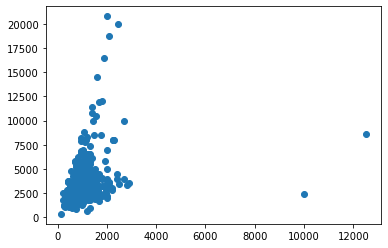

In [154]:
#checking again
import matplotlib.pyplot as plt

plt.scatter(nyc_df['SQFT'], nyc_df['PRICE'])

In [157]:
nyc_df[nyc_df.SQFT > 8000]

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
1706,2395.0,Live on the Ocean! XL 2BR! S-Steel Kitchen! See video!,ROCKAWAY PARK,2.0,1.0,10000.0,True,False,on site,none,False,QUEENS
262,8650.0,GORGEOUS 3 BR 2 BA W A/C ***WASHER/DRYER IN UNIT***,MIDTOWN EAST,3.0,2.0,12500.0,False,False,in unit,none,False,MANHATTAN


In [158]:
#through some detective work, found the actual square footage:
nyc_df.loc[nyc_df['SQFT']==12500.0, 'SQFT'] = 1250.0
nyc_df.loc[nyc_df['SQFT']==10000.0, 'SQFT'] = 1000.0

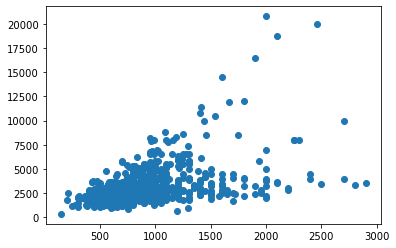

In [163]:
#checking again
newplot = plt.scatter(nyc_df['SQFT'], nyc_df['PRICE'])

In [164]:
nyc_df.to_csv('nyc.csv', index=False)

In [7]:
#checking out more stuff
import pandas as pd

nyc = pd.read_csv('nyc.csv')
pd.set_option("display.max_colwidth", None)

In [8]:
(nyc.loc[(nyc['BR'] > 3) & (nyc['BA'] < 2)]).head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
20,3200.0,SPACIOUS Renovated TRUE GEM_ Nice Kitchen_True Beauty**NO FEE**,BUSHWICK,4.0,1.5,NaN,False,False,on site,none,False,BROOKLYN
94,3799.0,*No Fee!* Spacious 4br Duplex in the heart of Bushwick! $3799/m!,BUSHWICK,4.0,1.5,NaN,False,False,on site,none,False,BROOKLYN
96,2800.0,*No Fee* Artist-friendly loft in Prime Bushwick! $2800/mo!,BUSHWICK,4.0,1.0,NaN,False,False,on site,none,False,BROOKLYN
111,3599.0,Great location! Large 4 br apartment steps Prospect Park !!,CROWN HEIGHTS @ 2 3 4 5 TRAINS,4.0,1.0,NaN,False,False,on site,none,False,BROOKLYN
135,4650.0,►►STUNNING 4 BEDROOM DUPLEX IN LUXURY BLDG IN WILLIAMSBURG★NO FEE★,WILLIAMSBURG,4.0,1.0,NaN,True,True,on site,none,True,BROOKLYN


In [9]:
(nyc.loc[(nyc['BR'] <= 3) & (nyc['BA'] >= 2)]).head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
6,4400.0,Newly Constructed Prime Greenpoint 3 Bed 2 Full Bathroom w/Skylights,GREENPOINT,3.0,2.0,NaN,False,False,on site,none,False,BROOKLYN
22,2795.0,"🌼 Beautiful 2Bd,2Bath with Private back yard 🌼Great price,",CROWN HEIGHTS,2.0,2.0,NaN,True,False,in unit,none,False,BROOKLYN
33,2500.0,➽➽➽ AMAZING U found a gem/2 Bed/2 Bath*NO FEE*,BUSHWICK,2.0,2.0,NaN,False,False,none,none,False,BROOKLYN
41,2200.0,BRIGHTON BEACH * 2 BED * CENTRAL AIR * ELEVATOR * VIRTUAL DOORMAN,BRIGHTON BEACH,2.0,2.0,NaN,False,False,on site,none,False,BROOKLYN
73,2650.0,BEDSTUY * 2 BED * GYM * LAUNDRY * ELEVATOR * ROOF ACCESS,BEDSTUY,2.0,2.0,NaN,False,False,on site,none,False,BROOKLYN


In [10]:
nyc.loc[nyc['BA'] > 3]


,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
467,4769.0,Gorgeous Renovated 5Bed/2Bath in Elevator Pre-War Building!,CROWN HEIGHTS @ FRANKLIN AV 2/3/4/5/S,2.0,5.0,NaN,False,False,on site,none,False,BROOKLYN
955,4000.0,Master Bedroom Suite in Spacious Townhome,BROOKLYN,3.0,4.0,2700.0,False,False,in unit,none,False,BROOKLYN
968,4520.0,Luxury 4 Bedroom 4 bath Apts Top of the line Finishes!,WILLIAMSBURG,4.0,4.0,NaN,False,False,on site,none,False,BROOKLYN
972,4800.0,This four bed four bath has lots of natural light and tone of living s,BUSHWICK,4.0,4.0,NaN,False,False,on site,none,False,BROOKLYN
1346,4600.0,Dope Bushwick 4 Bed!,NAN,4.0,4.0,NaN,True,True,on site,none,True,BROOKLYN
2198,2950.0,@ 4bed/3.5bath Apt + almost All Utility/ Laundry/ Terrace+ Sub (E/M/R),"ELMHURST, NY",4.0,3.5,NaN,False,True,on site,none,True,QUEENS
2890,3500.0,Beautiful 4 Bedroom Apartment With Great Building Amenities,RIDGEWOOD,4.0,4.0,NaN,True,False,on site,none,False,QUEENS
2971,5950.0,"PERFECT 5 BEDROOM HOME IN FOREST HILLS GARDENS!,","FOREST HILLS GARDENS, NY",5.0,4.5,NaN,False,True,on site,off-street,True,QUEENS
2972,5995.0,WELCOME HOME!,"FOREST HILLS GARDENS, NY",5.0,4.5,NaN,False,True,on site,off-street,True,QUEENS
3289,12995.0,*NO FEE*Private 4BR/4.5 bath 4-story Carriage House on E26th St!,MURRAY HILL,4.0,4.5,NaN,True,False,in unit,none,False,MANHATTAN


In [11]:
nyc.loc[nyc['TITLE']=='Gorgeous Renovated 5Bed/2Bath in Elevator Pre-War Building!', 'BR'] = 5
nyc.loc[nyc['TITLE']=='Gorgeous Renovated 5Bed/2Bath in Elevator Pre-War Building!', 'BA'] = 2

In [13]:
nyc = nyc[nyc['BOROUGH']!='NEW JERSEY']
nyc = nyc[~nyc['BOROUGH'].isna()]

<AxesSubplot:xlabel='WD', ylabel='Count'>

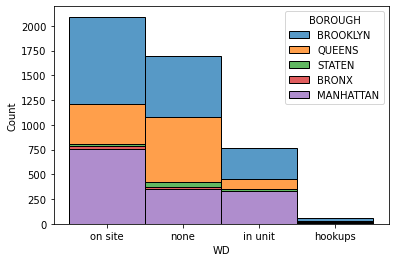

In [20]:
import seaborn as sns
sns.histplot(x='WD', data=nyc, multiple='stack', hue='BOROUGH')

In [22]:
(nyc.loc[nyc['WD'] =='hookups']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 91 to 4473
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRICE     63 non-null     float64
 1   TITLE     63 non-null     object 
 2   LOCATION  63 non-null     object 
 3   BR        63 non-null     float64
 4   BA        63 non-null     float64
 5   SQFT      21 non-null     float64
 6   APP_FEE   63 non-null     bool   
 7   BROK_FEE  63 non-null     bool   
 8   WD        63 non-null     object 
 9   PARKING   63 non-null     object 
 10  PETS      63 non-null     bool   
 11  BOROUGH   63 non-null     object 
dtypes: bool(3), float64(4), object(5)
memory usage: 5.1+ KB


In [23]:
#i don't think these listings actually have hookups--maybe in building
nyc.loc[nyc['WD'] =='hookups', 'WD'] = 'on site'

In [24]:
nyc.to_csv('nyc.csv', index=False)

In [26]:
nyc.loc[3975]

PRICE                                                        6500.0
TITLE       ★EXQUISITE LUXURY CONDO WITH A WIDE RANGE OF AMENITIES★
LOCATION                                            UPPER WEST SIDE
BR                                                              2.0
BA                                                              1.0
SQFT                                                         1049.0
APP_FEE                                                       False
BROK_FEE                                                      False
WD                                                          in unit
PARKING                                                       valet
PETS                                                          False
BOROUGH                                                   MANHATTAN
Name: 3975, dtype: object